In [1]:
import torch, pdb
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn

Visualization

In [2]:
def show(tensor, ch=1, size =(28, 28),  num=16 ):
    data = tensor.detach().cpu().view(-1, ch, *size)#128 x 1 x 28 x 28
    grid = make_grid(data[:num], nrow = 4 ).permute(1, 2, 0) #1 x 28 x 28 --> 28 x 28 x 1
    plt.imshow(grid)
    plt.show()


In [3]:
cycles = 500
cur_step = 0
info_step = 300
mean_gen_loss = 0
mean_disc_loss = 0

z_dim = 64
lr = 0.0001
loss_func = torch.nn.BCEWithLogitsLoss()

bs = 128
device = 'cuda'

dataloader = DataLoader(MNIST('.', download = True, transform = transforms.ToTensor()), batch_size = bs, shuffle = True)

Generator

In [4]:
def genBlock(inp, out):
    return nn.Sequential(nn.Linear(inp, out), nn.BatchNorm1d(out), nn.ReLU(inplace = True))

class Generator(nn.Module):
  def __init__(self, z_dim = 64, i_dim = 784, h_dim = 128):
    super().__init__()
    self.gen = nn.Sequential(genBlock(z_dim, h_dim),
                             genBlock(h_dim, h_dim*2),
                             genBlock(h_dim*2, h_dim*4),
                             genBlock(h_dim*4, h_dim*8),
                             nn.Linear(h_dim*8, i_dim),
                             nn.Sigmoid())

  def forward(self, noise):
    return self.gen(noise)

def gen_noise(number, z_dim):
  return torch.randn(number, z_dim).to('cuda')




Discriminator

In [5]:
def discBlock(inp, out):
  return nn.Sequential(nn.Linear(inp, out), nn.LeakyReLU(0.1))

class Discriminator(nn.Module):
  def __init__(self, z_dim = 64, i_dim = 784, h_dim = 128):
    super().__init__()
    self.disc = nn.Sequential(discBlock(i_dim, h_dim*5),
                              discBlock(h_dim*5, h_dim*3),
                              discBlock(h_dim*3, h_dim),
                              nn.Linear(h_dim, 1),
                              )
  def forward(self, image):
    return self.disc(image)

In [6]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.RMSprop(gen.parameters(), lr = lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.RMSprop(disc.parameters(), lr = lr)


Generator Loss

In [7]:
def gen_loss(z_dim, gen, disc, bs, loss_func):
  return loss_func(disc(gen(gen_noise(bs, z_dim))), torch.ones_like(disc(gen(gen_noise(bs, z_dim)))))

Discriminator Loss

In [8]:
def disc_loss(z_dim, gen, disc, bs, loss_func, real):
  fake_pred = disc((gen(gen_noise(bs, z_dim))).detach())
  real_pred = disc(real)
  fake_loss = loss_func(fake_pred, torch.zeros_like(fake_pred))
  real_loss = loss_func(real_pred, torch.ones_like(real_pred))
  return (fake_loss + real_loss)/2


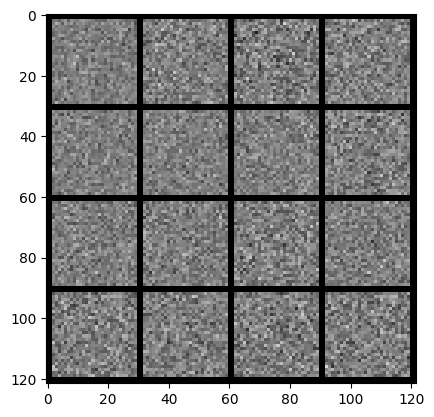

In [9]:
x, y = next(iter(dataloader))
noise = gen_noise(bs, z_dim)
fake = gen(noise)
show(fake)
pred = disc(fake)


Main Training Loop

  0%|          | 0/469 [00:00<?, ?it/s]

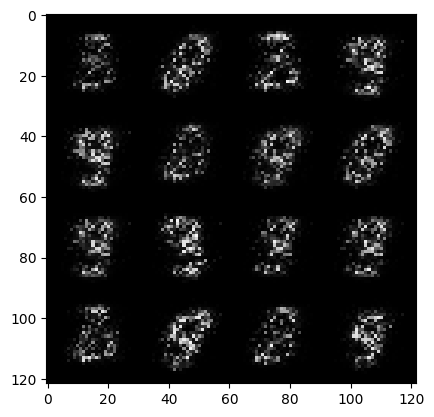

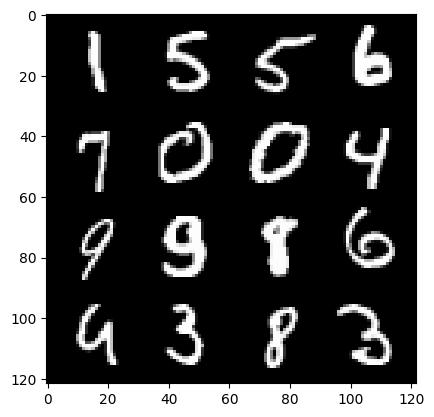

  0%|          | 0/469 [00:00<?, ?it/s]

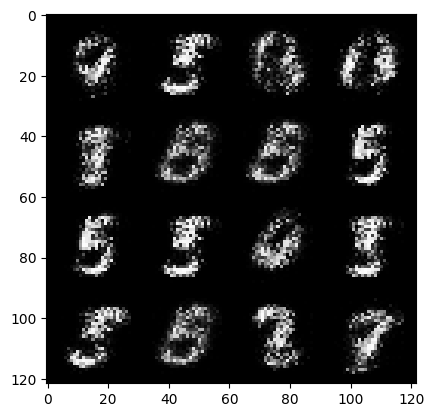

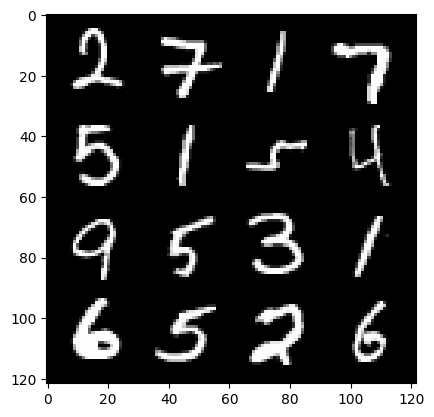

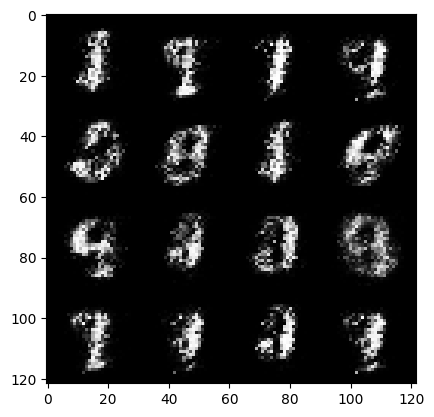

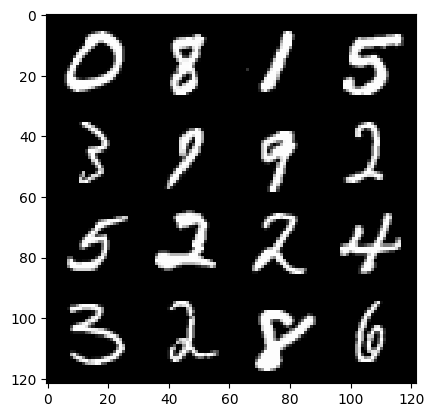

  0%|          | 0/469 [00:00<?, ?it/s]

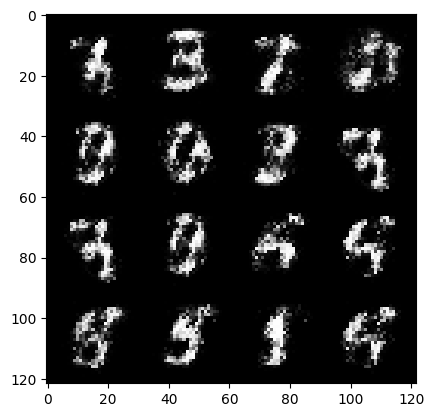

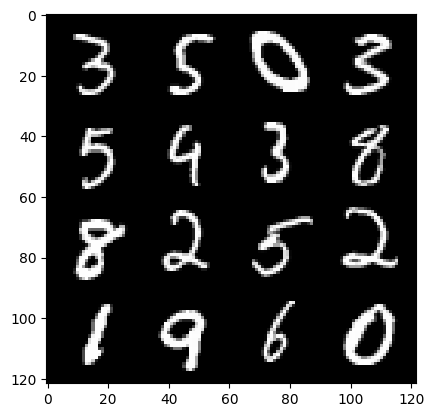

  0%|          | 0/469 [00:00<?, ?it/s]

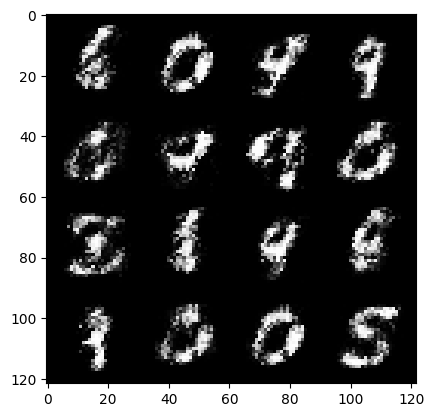

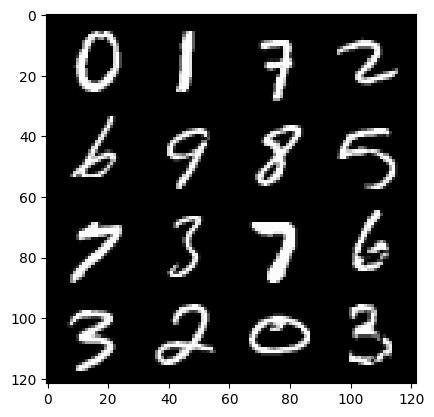

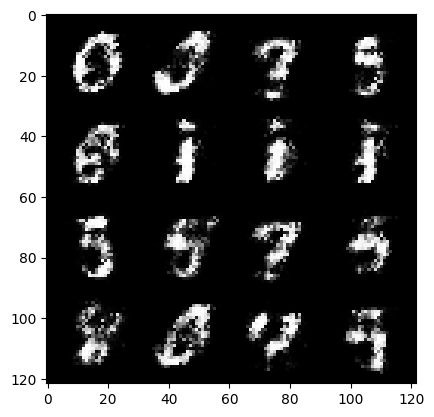

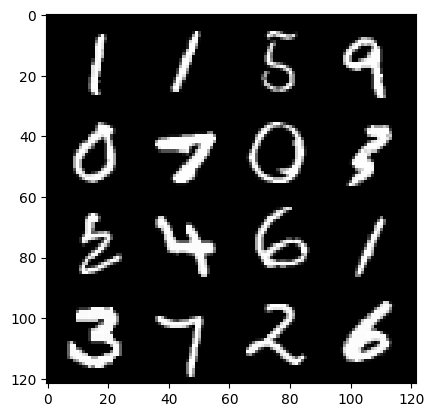

  0%|          | 0/469 [00:00<?, ?it/s]

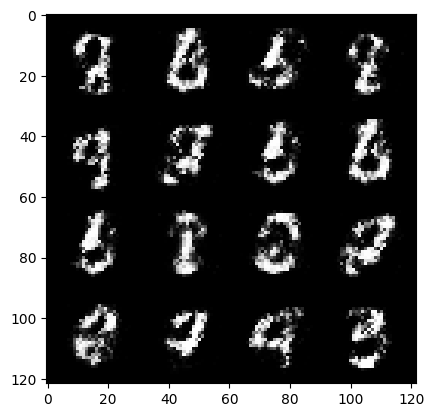

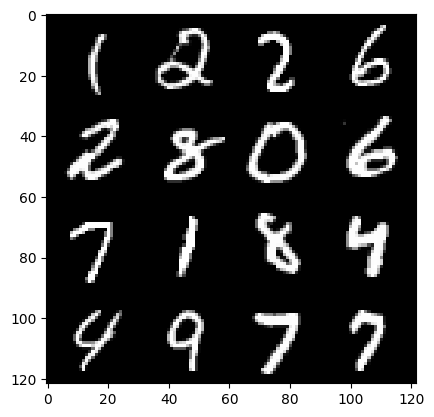

  0%|          | 0/469 [00:00<?, ?it/s]

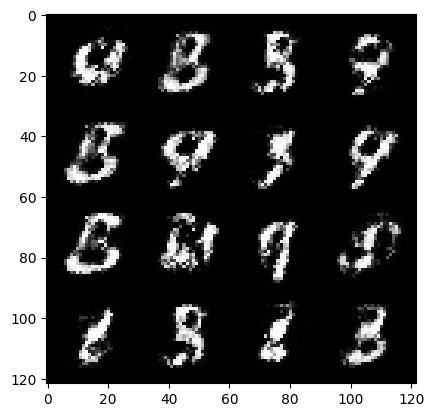

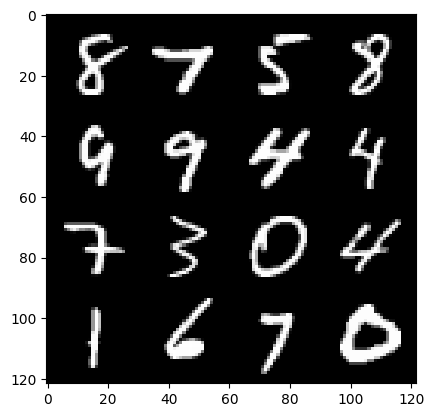

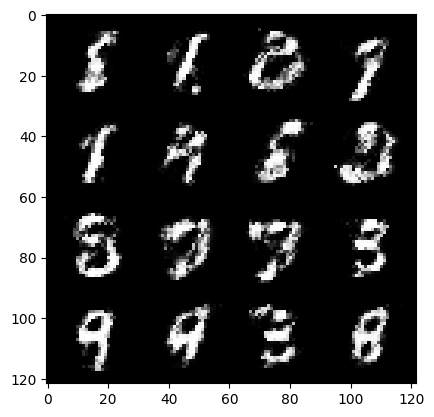

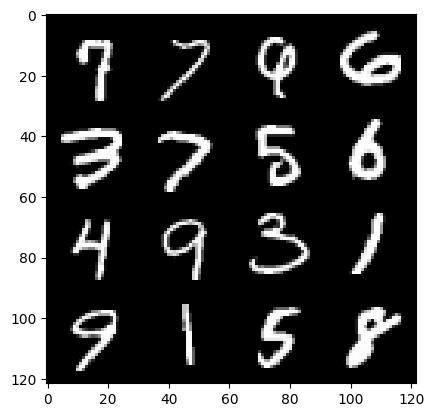

  0%|          | 0/469 [00:00<?, ?it/s]

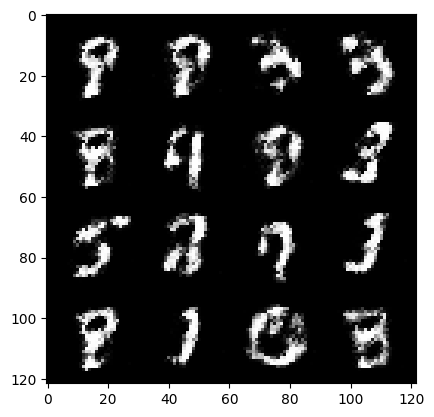

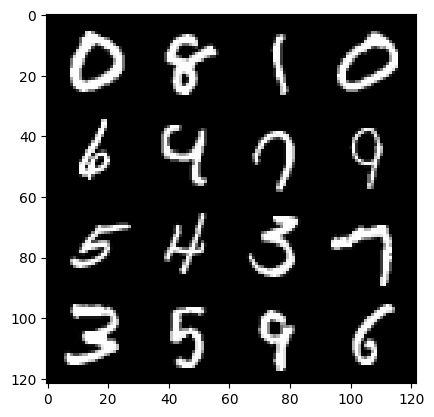

  0%|          | 0/469 [00:00<?, ?it/s]

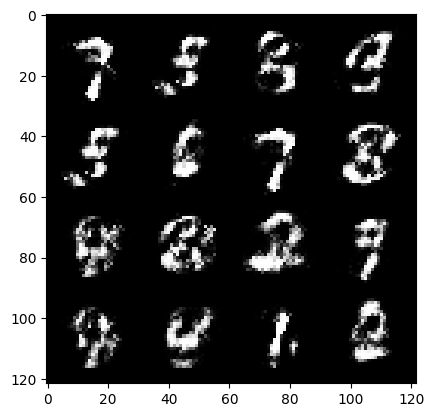

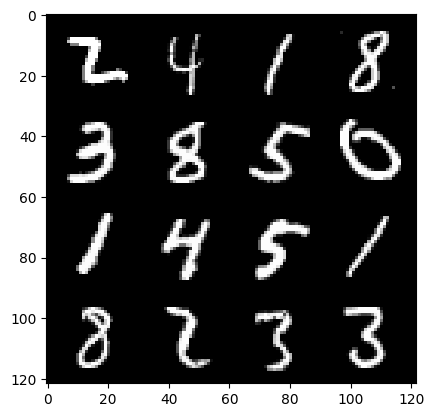

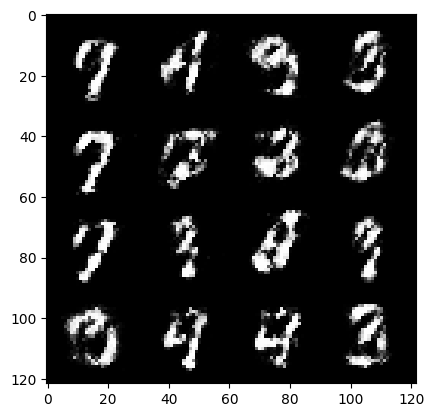

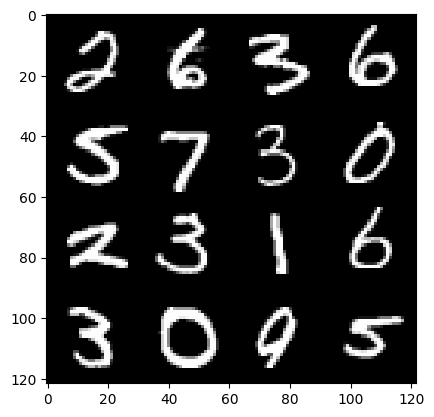

  0%|          | 0/469 [00:00<?, ?it/s]

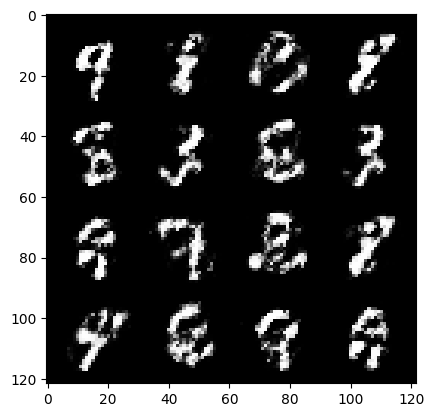

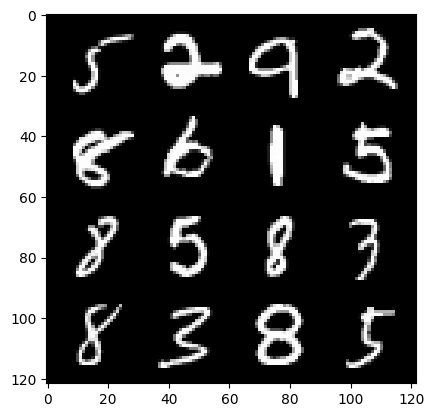

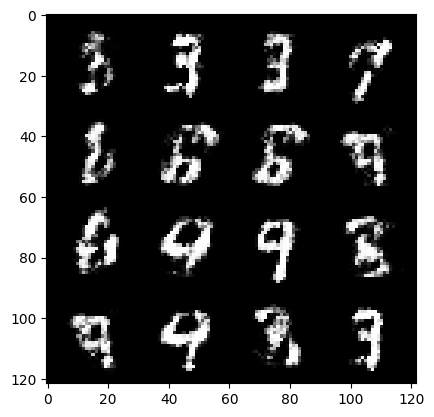

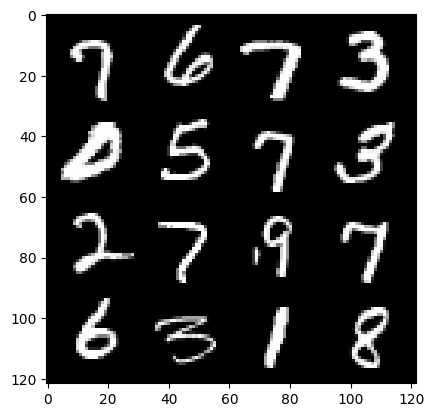

  0%|          | 0/469 [00:00<?, ?it/s]

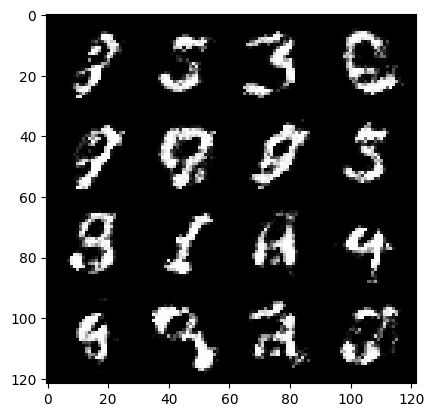

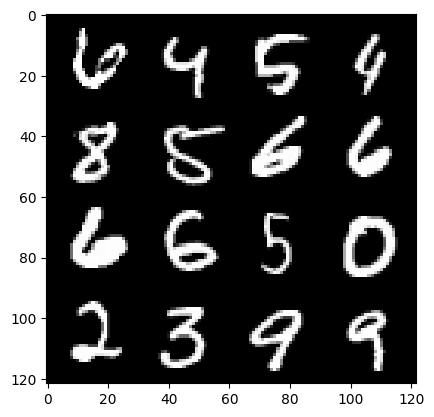

  0%|          | 0/469 [00:00<?, ?it/s]

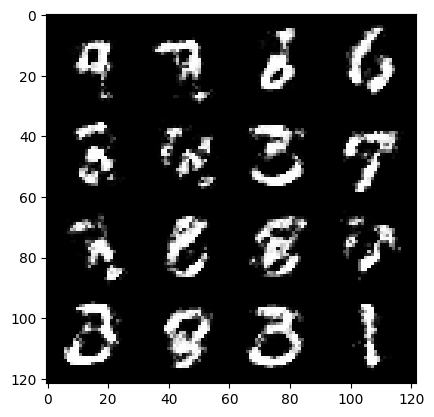

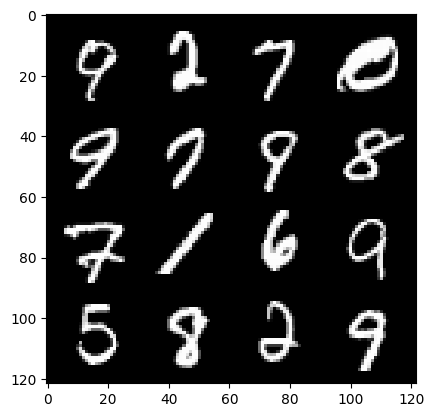

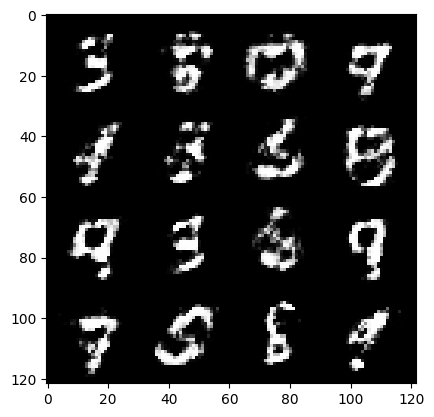

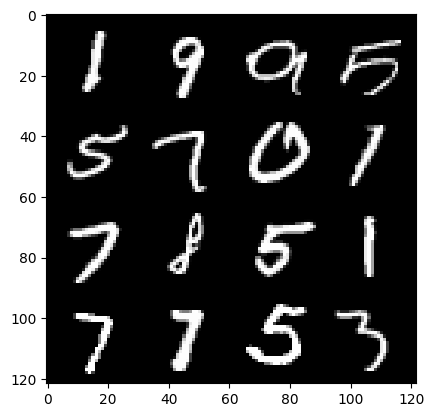

  0%|          | 0/469 [00:00<?, ?it/s]

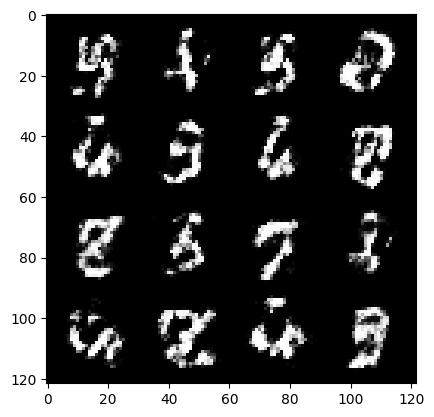

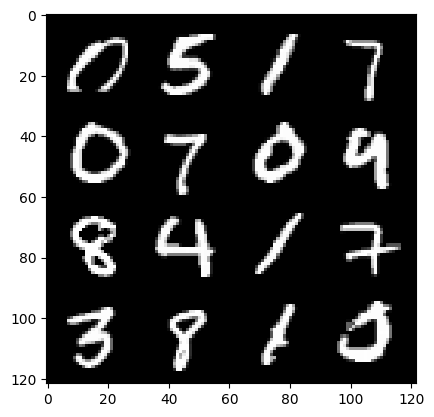

  0%|          | 0/469 [00:00<?, ?it/s]

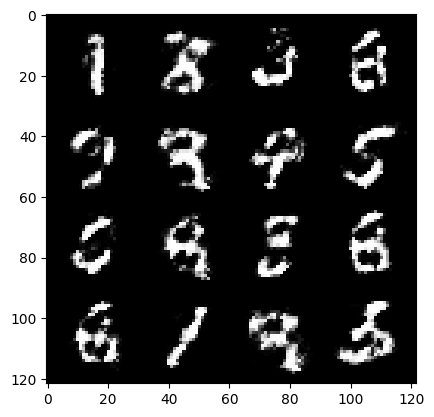

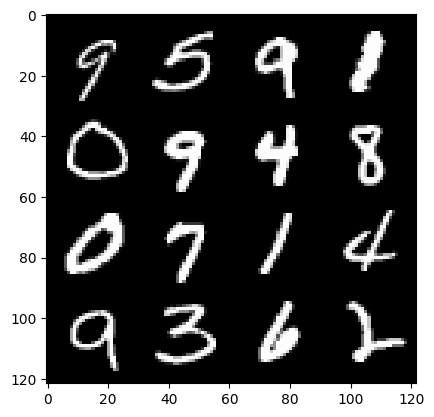

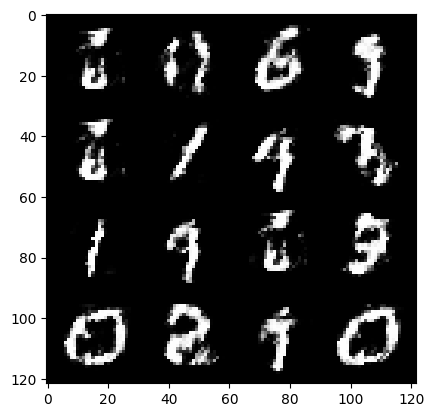

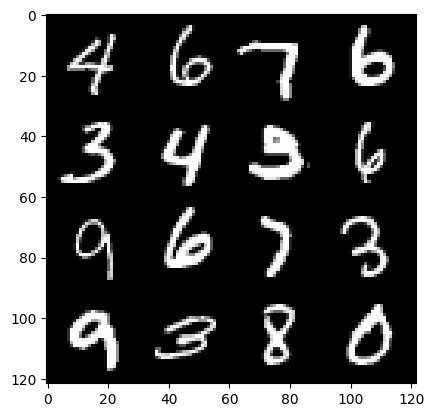

  0%|          | 0/469 [00:00<?, ?it/s]

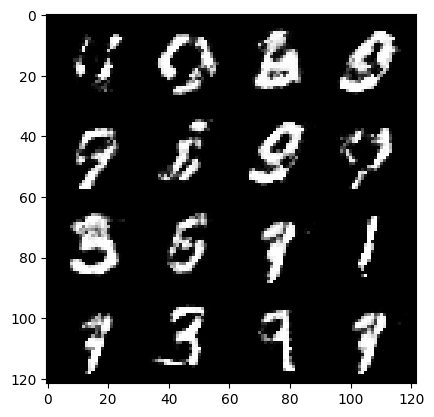

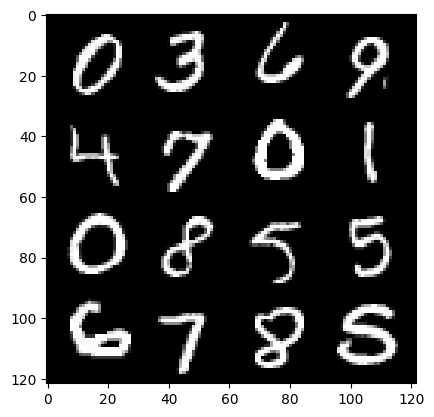

  0%|          | 0/469 [00:00<?, ?it/s]

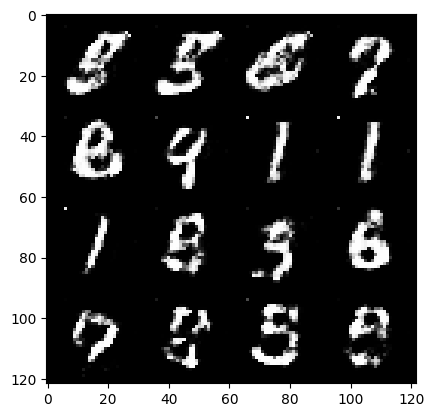

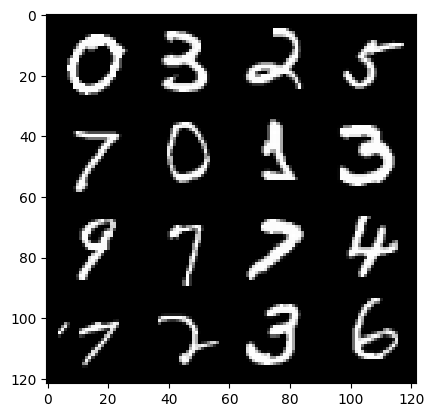

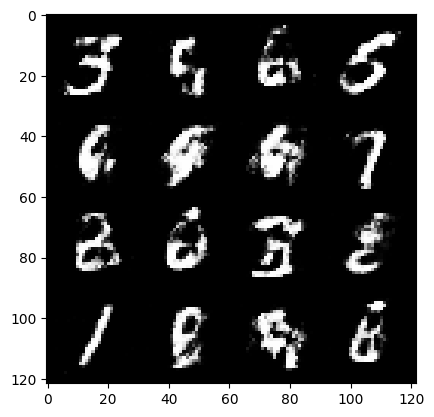

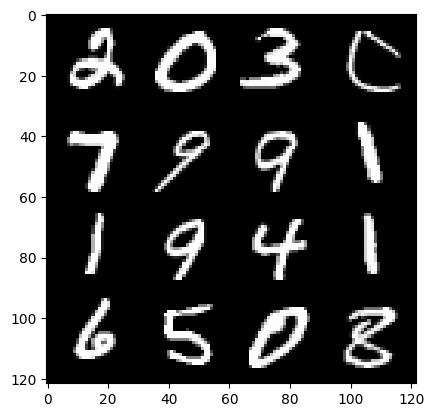

  0%|          | 0/469 [00:00<?, ?it/s]

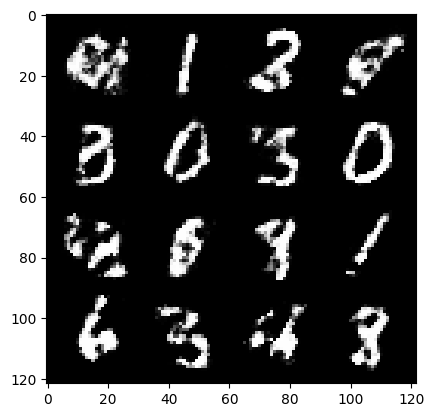

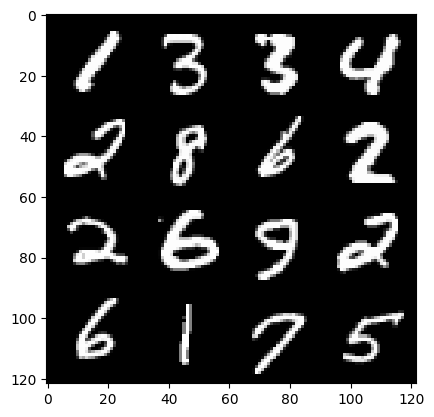

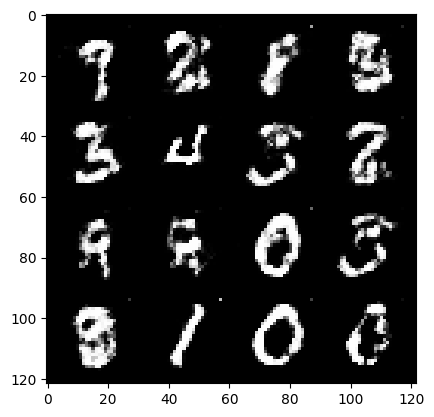

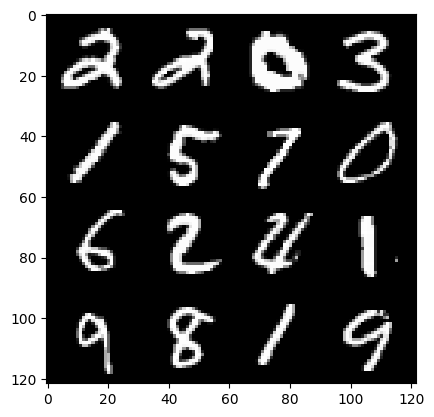

  0%|          | 0/469 [00:00<?, ?it/s]

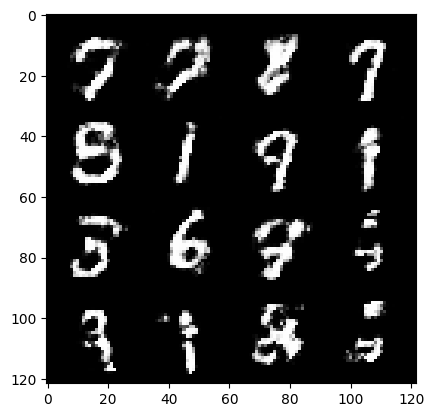

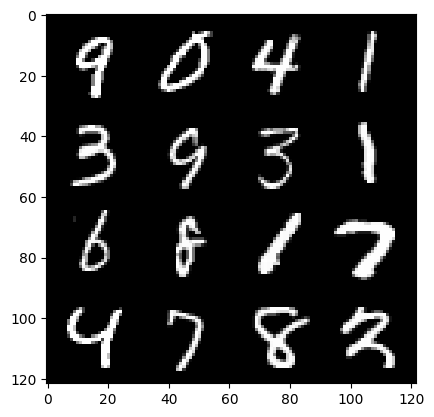

  0%|          | 0/469 [00:00<?, ?it/s]

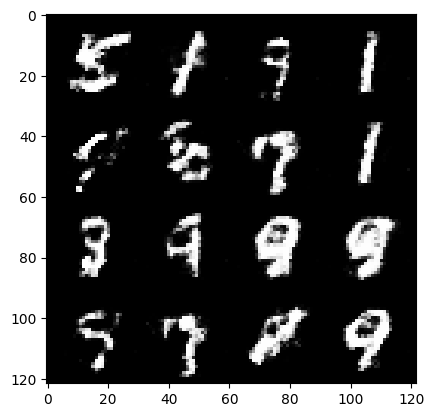

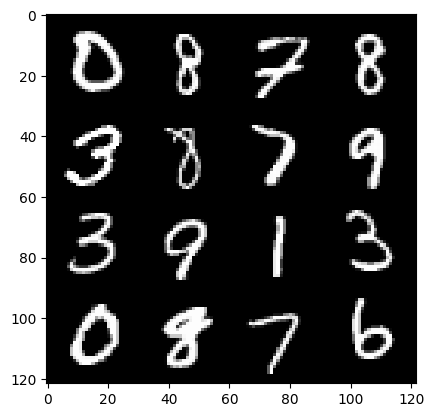

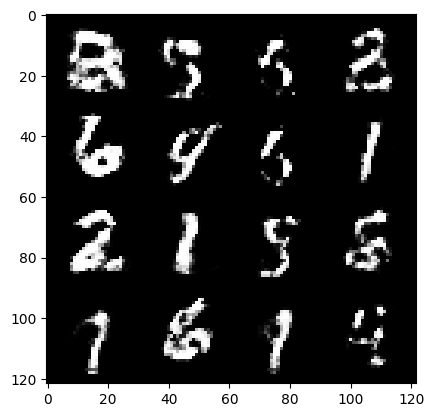

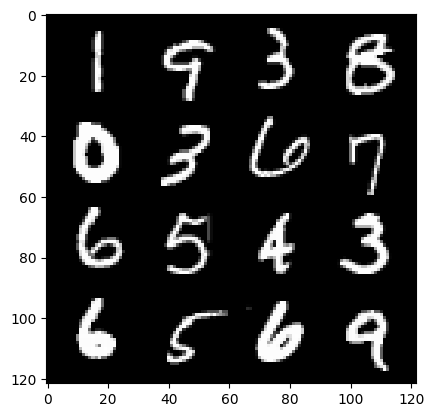

  0%|          | 0/469 [00:00<?, ?it/s]

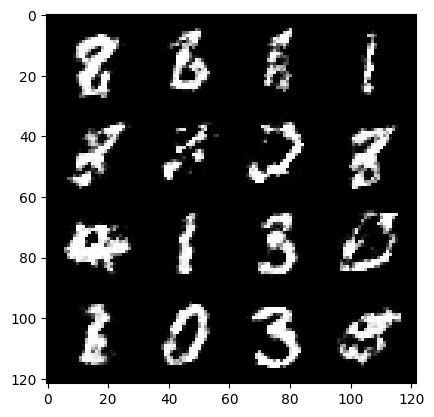

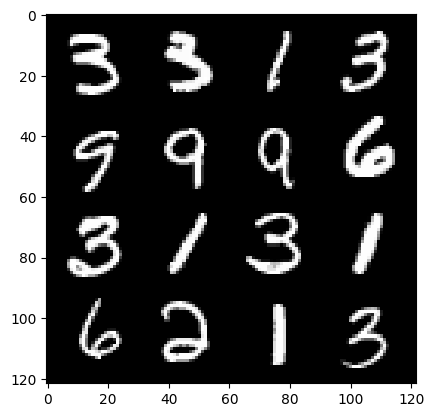

  0%|          | 0/469 [00:00<?, ?it/s]

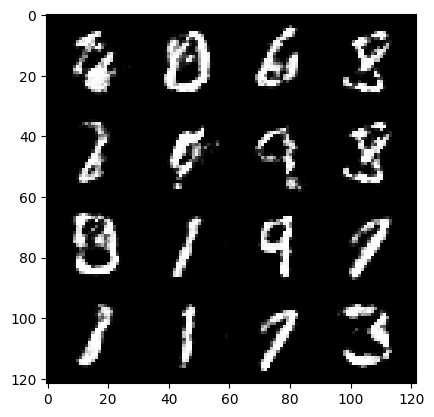

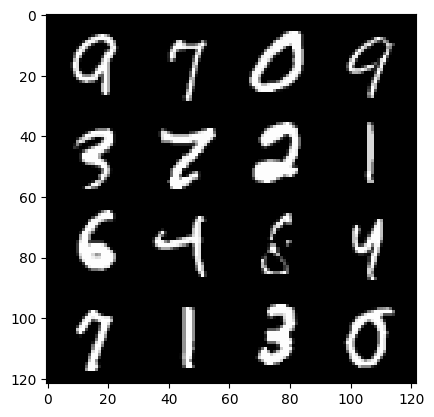

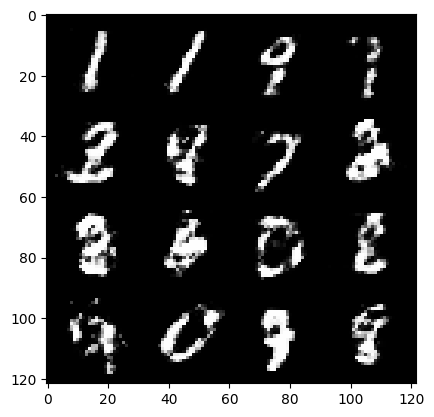

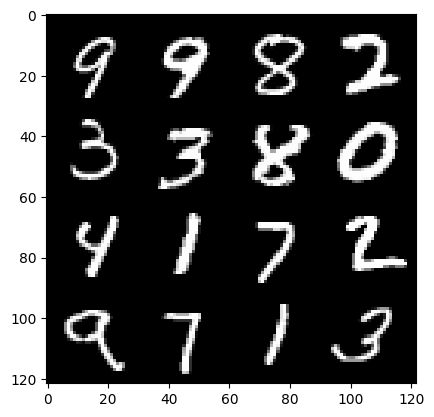

  0%|          | 0/469 [00:00<?, ?it/s]

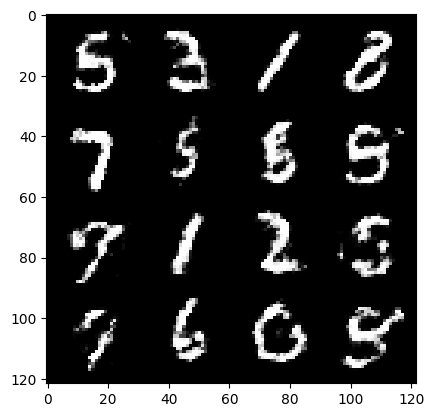

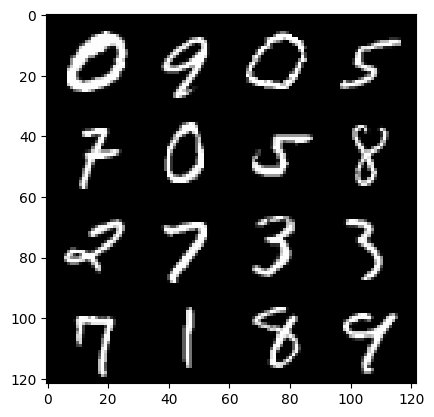

  0%|          | 0/469 [00:00<?, ?it/s]

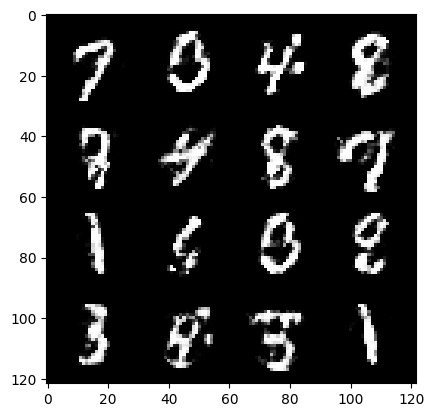

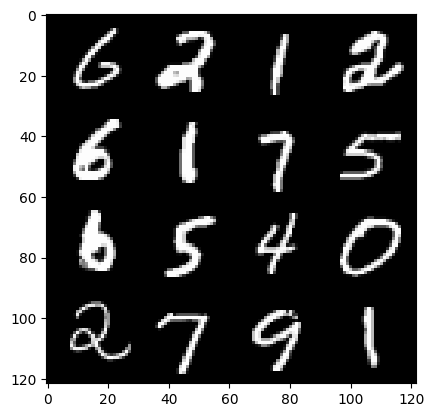

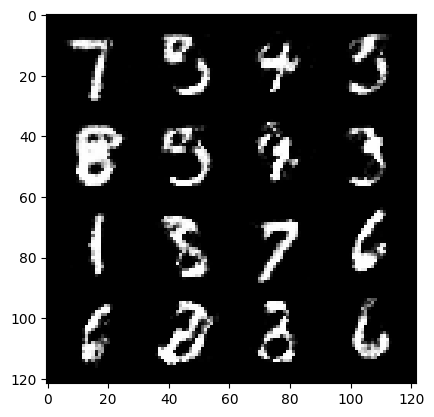

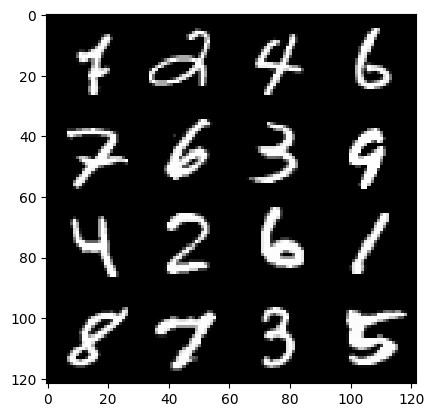

  0%|          | 0/469 [00:00<?, ?it/s]

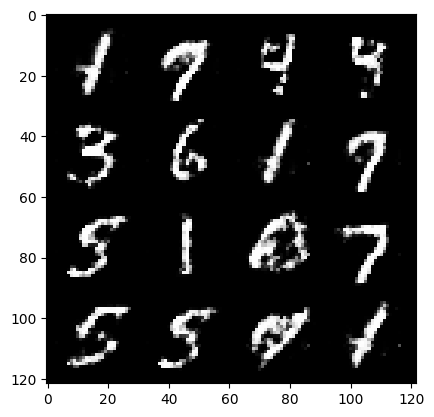

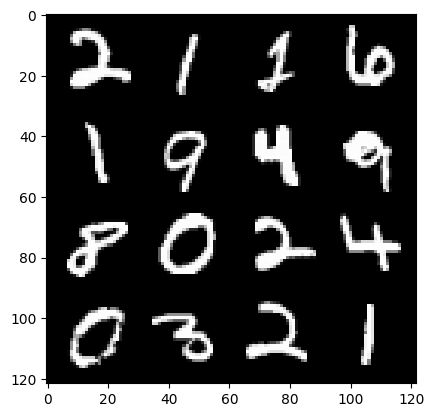

  0%|          | 0/469 [00:00<?, ?it/s]

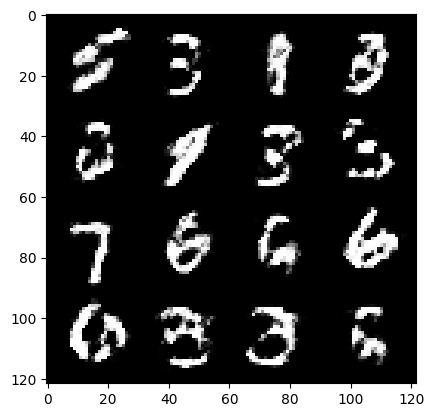

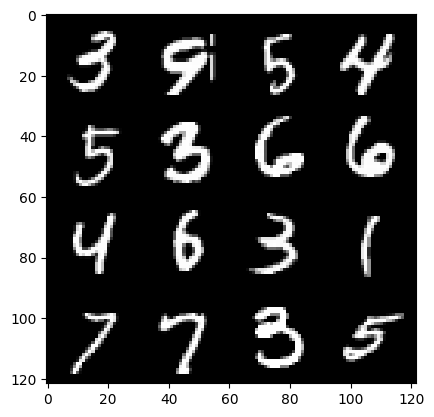

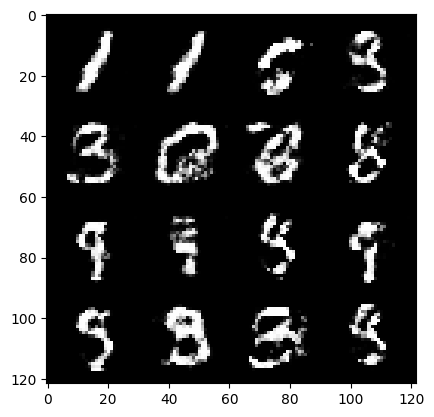

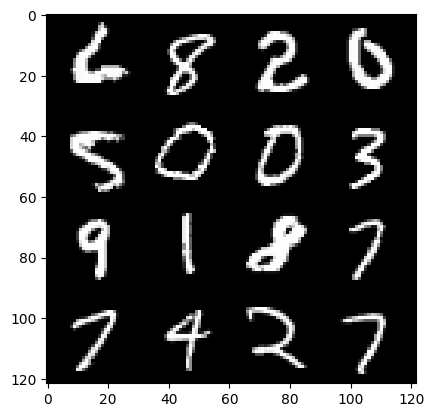

  0%|          | 0/469 [00:00<?, ?it/s]

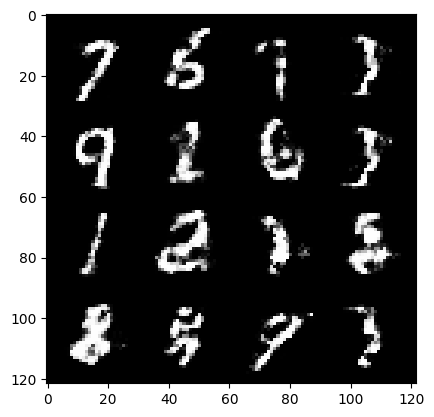

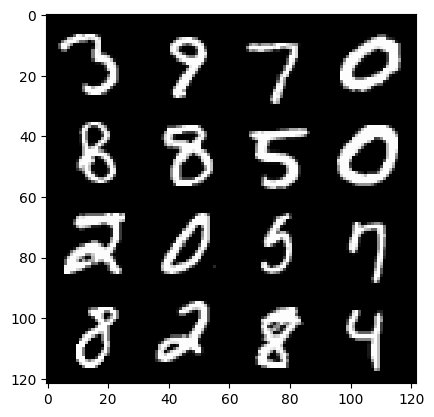

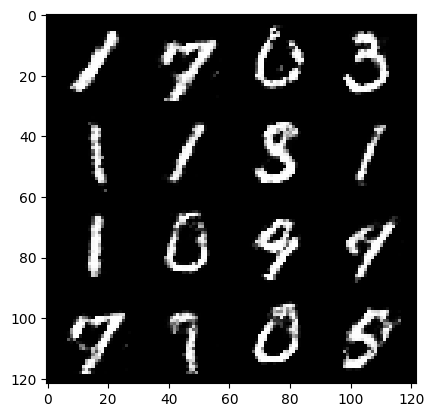

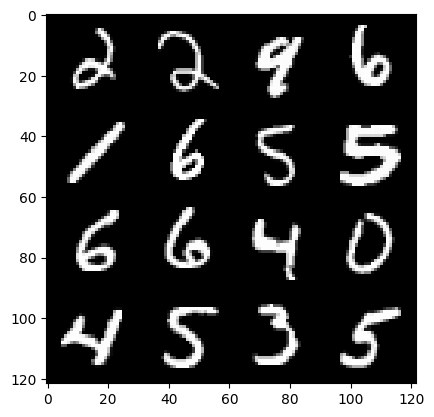

  0%|          | 0/469 [00:00<?, ?it/s]

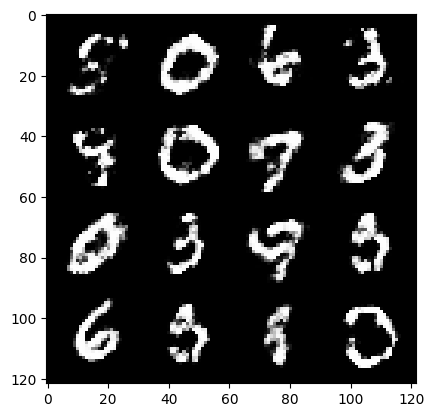

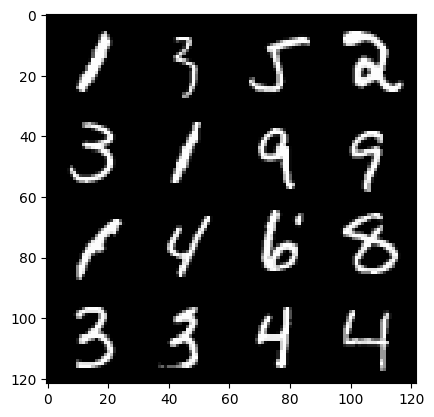

  0%|          | 0/469 [00:00<?, ?it/s]

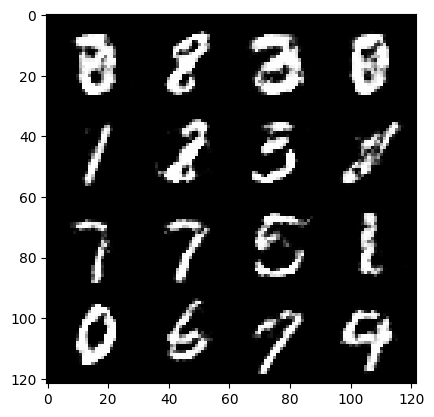

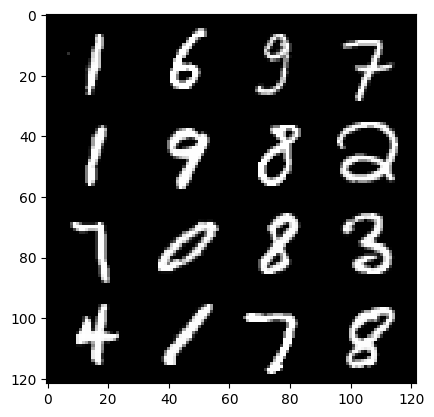

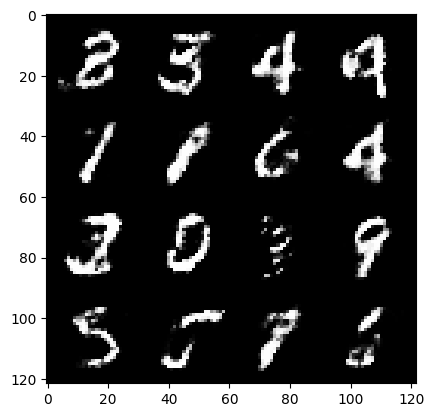

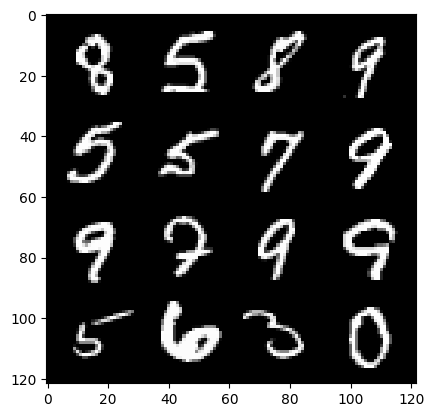

  0%|          | 0/469 [00:00<?, ?it/s]

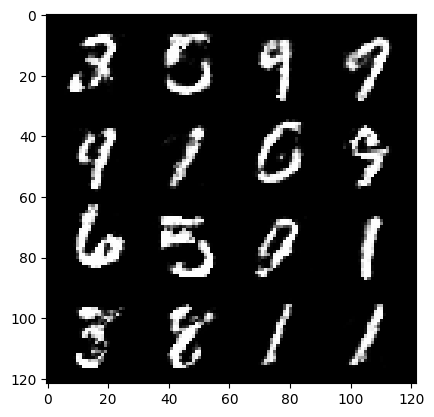

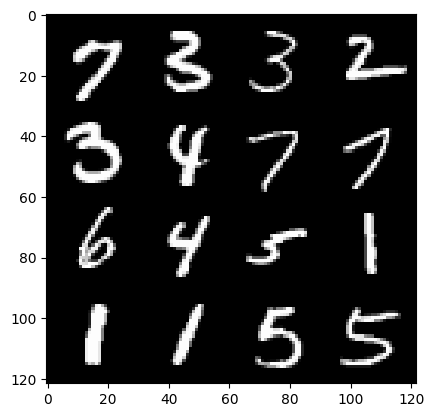

  0%|          | 0/469 [00:00<?, ?it/s]

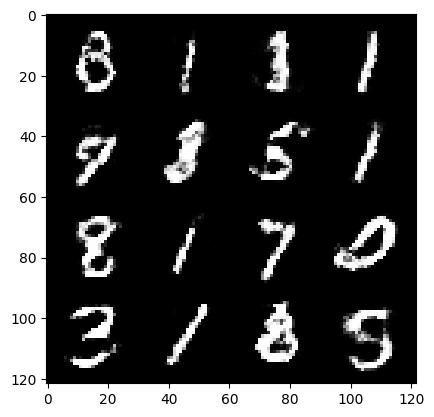

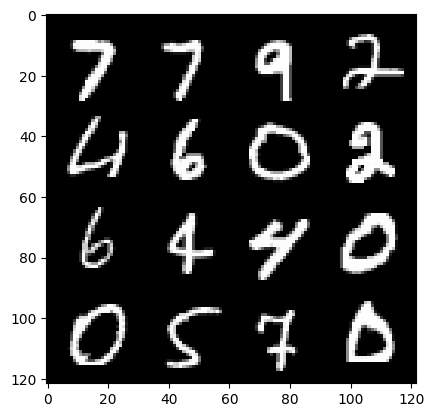

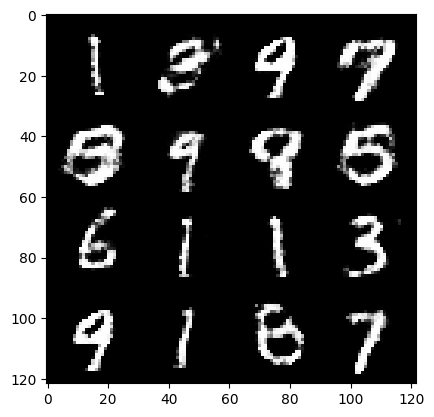

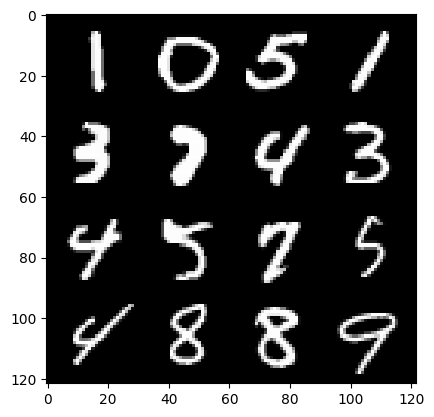

  0%|          | 0/469 [00:00<?, ?it/s]

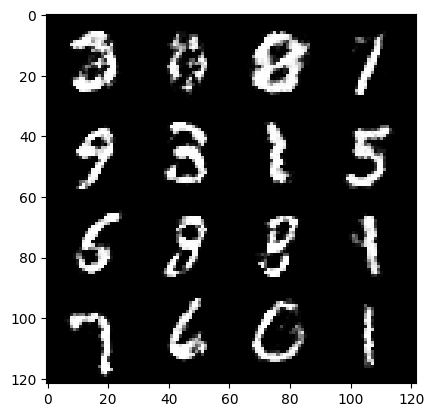

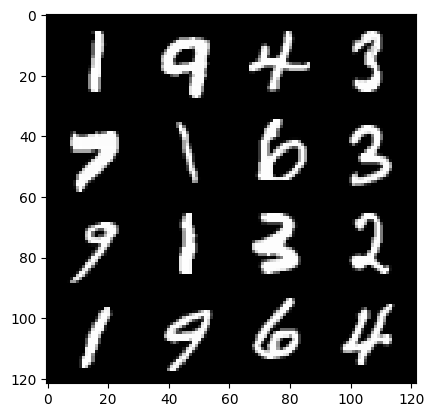

  0%|          | 0/469 [00:00<?, ?it/s]

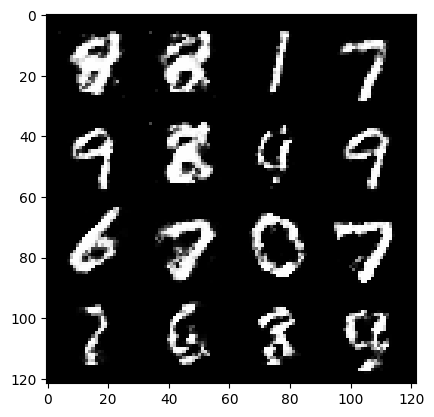

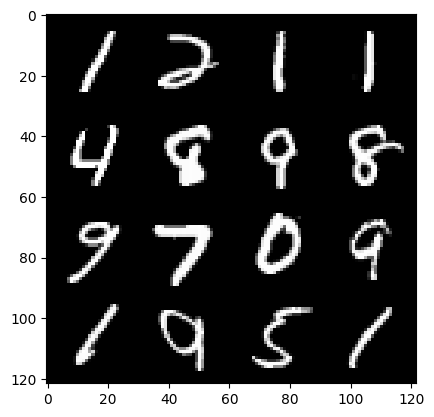

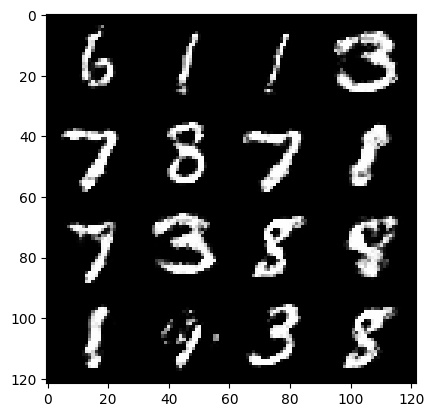

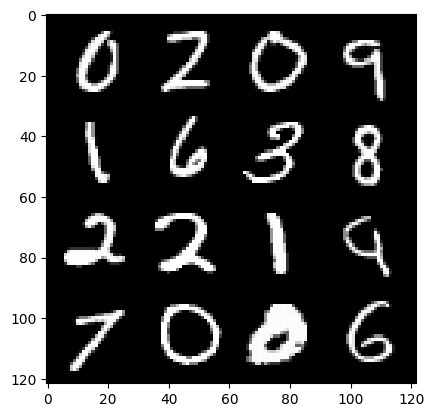

  0%|          | 0/469 [00:00<?, ?it/s]

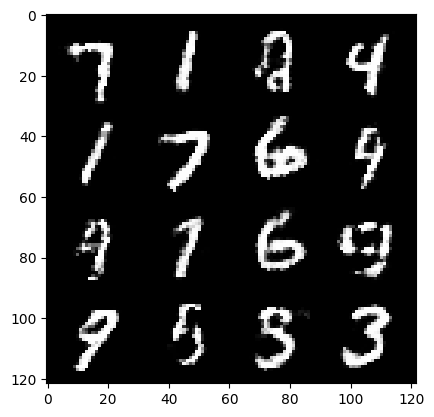

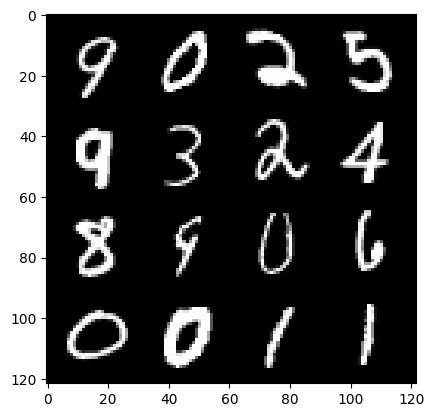

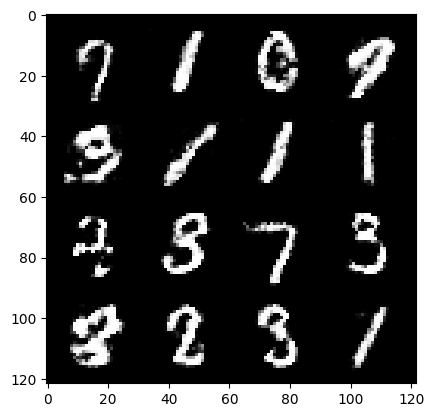

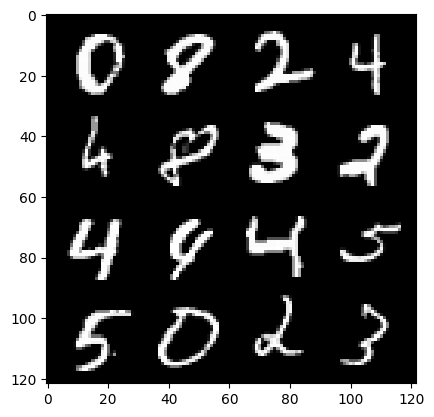

  0%|          | 0/469 [00:00<?, ?it/s]

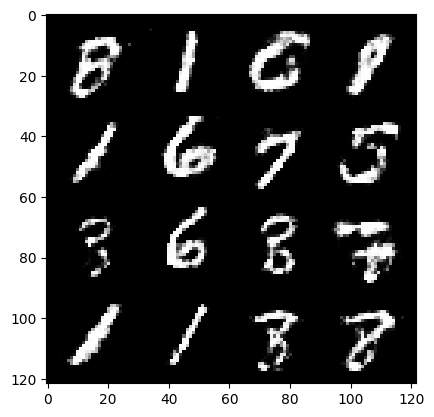

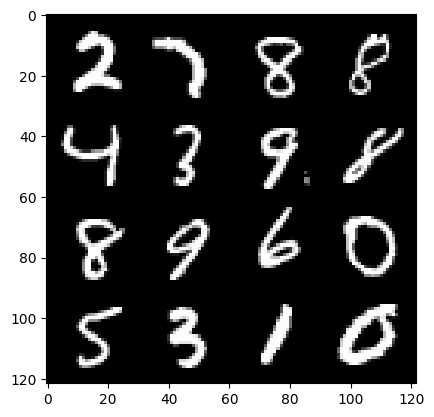

  0%|          | 0/469 [00:00<?, ?it/s]

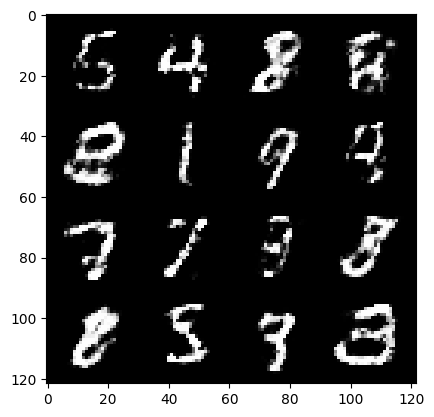

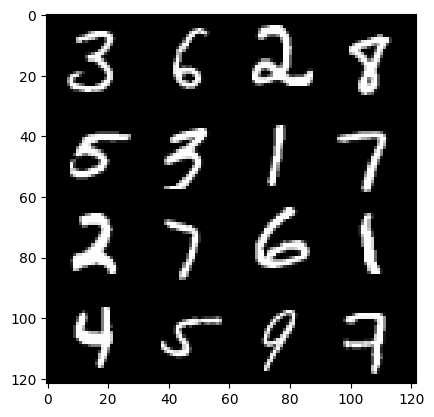

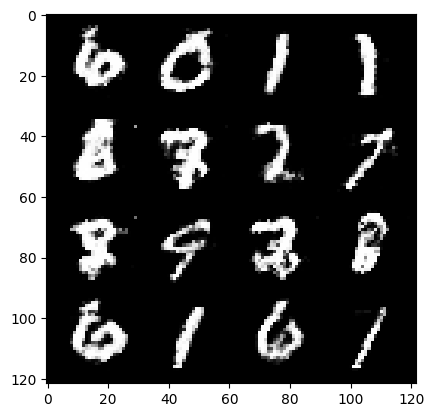

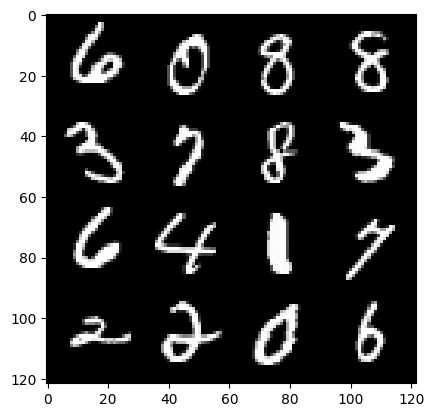

  0%|          | 0/469 [00:00<?, ?it/s]

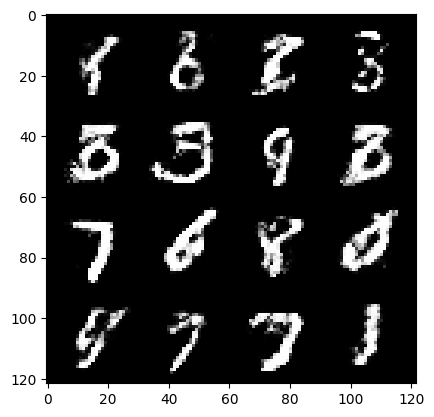

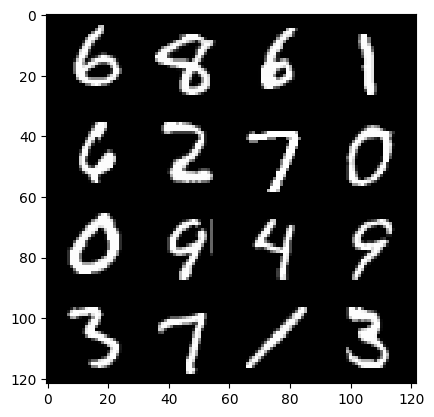

  0%|          | 0/469 [00:00<?, ?it/s]

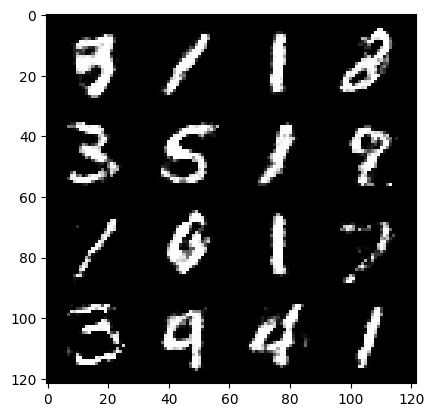

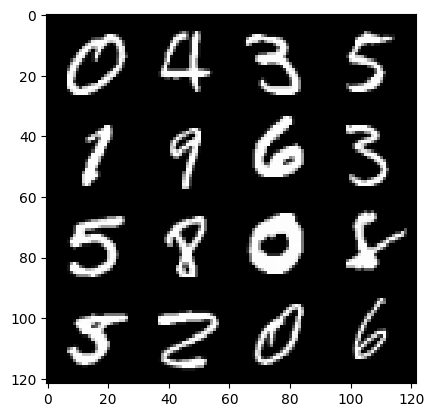

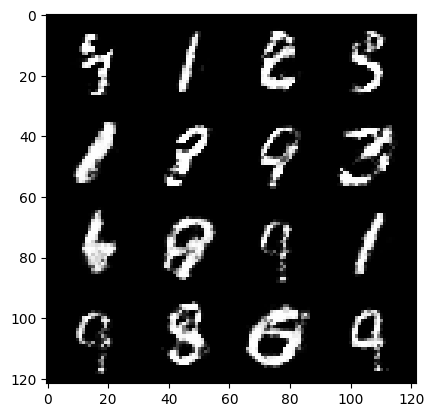

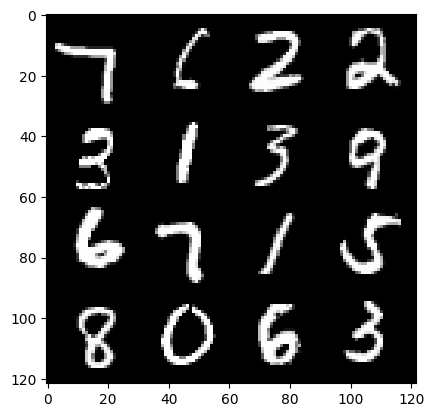

  0%|          | 0/469 [00:00<?, ?it/s]

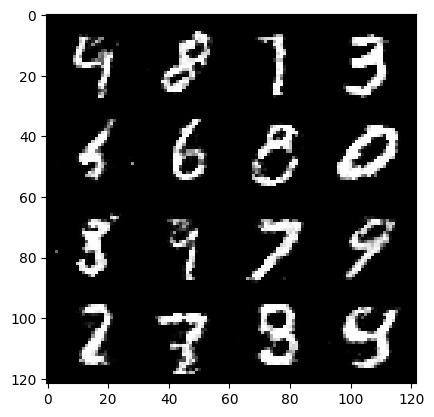

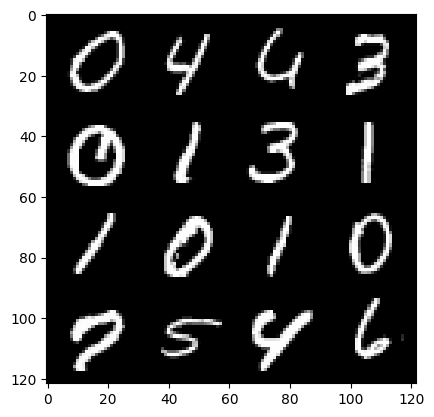

  0%|          | 0/469 [00:00<?, ?it/s]

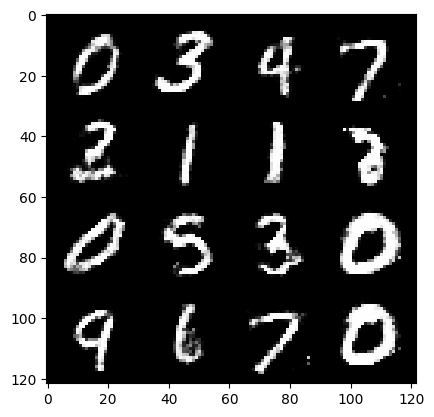

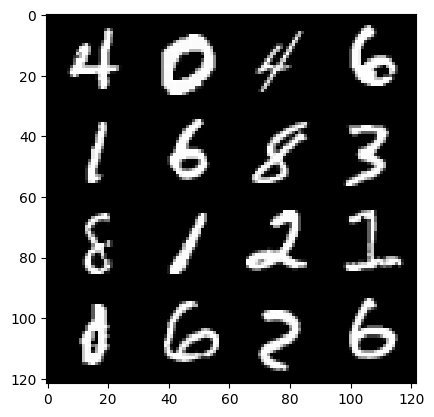

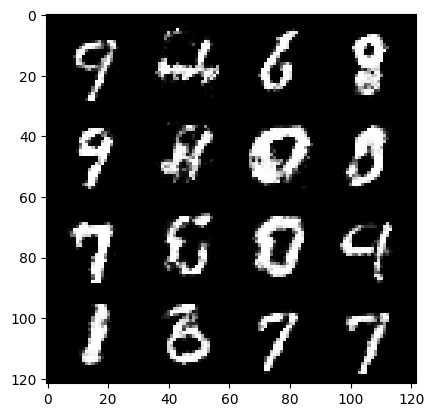

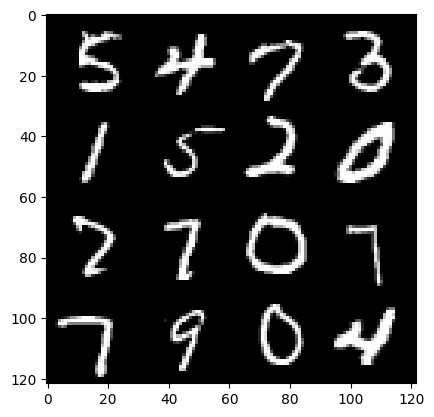

  0%|          | 0/469 [00:00<?, ?it/s]

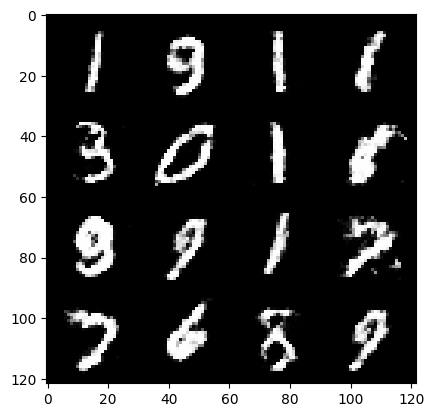

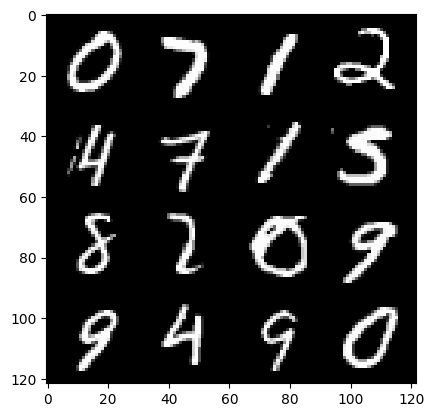

  0%|          | 0/469 [00:00<?, ?it/s]

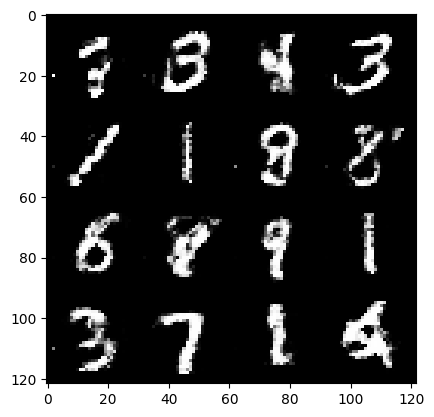

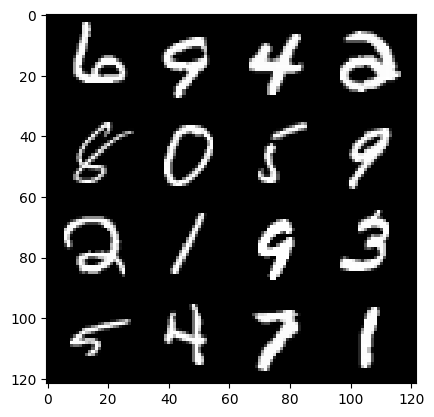

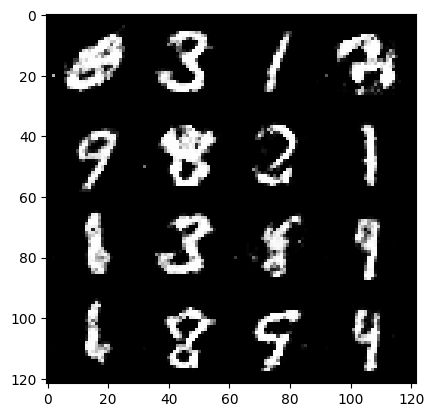

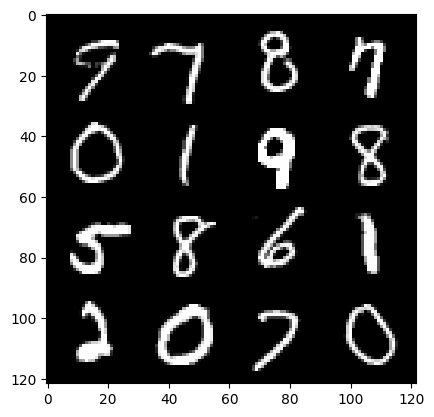

  0%|          | 0/469 [00:00<?, ?it/s]

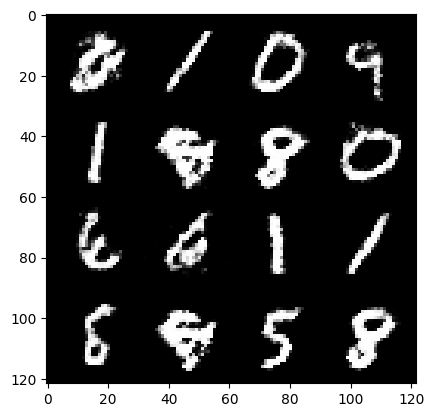

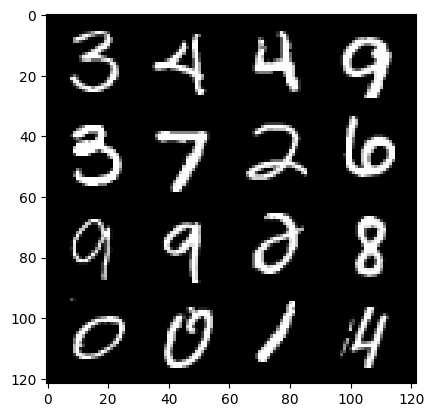

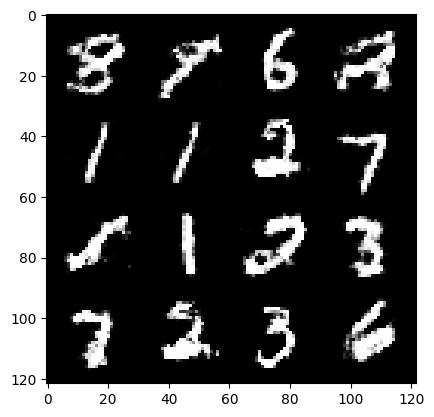

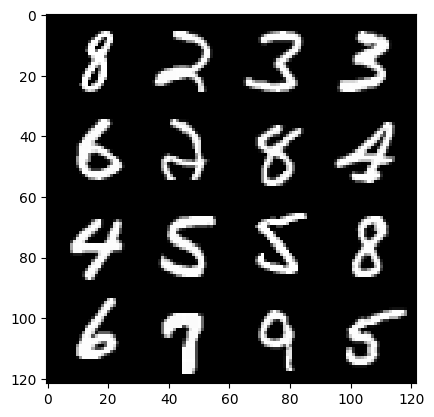

  0%|          | 0/469 [00:00<?, ?it/s]

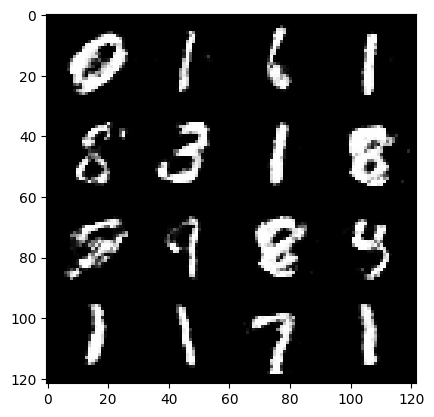

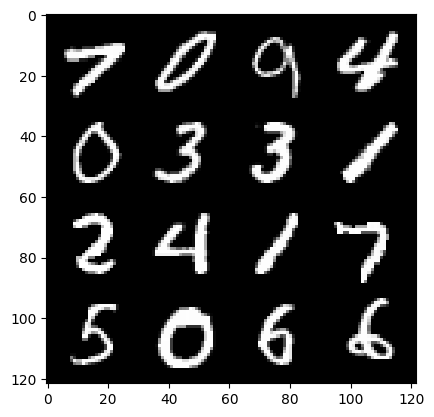

  0%|          | 0/469 [00:00<?, ?it/s]

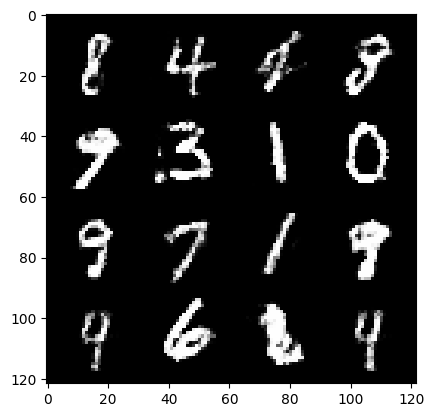

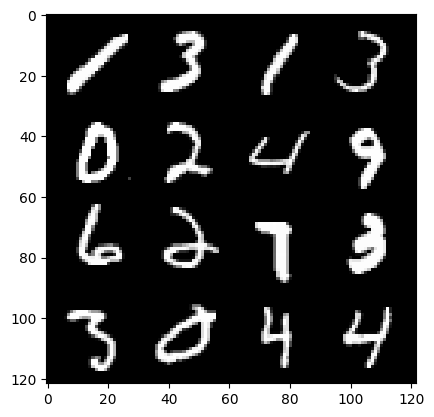

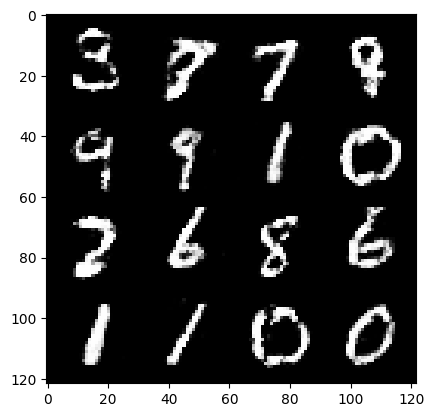

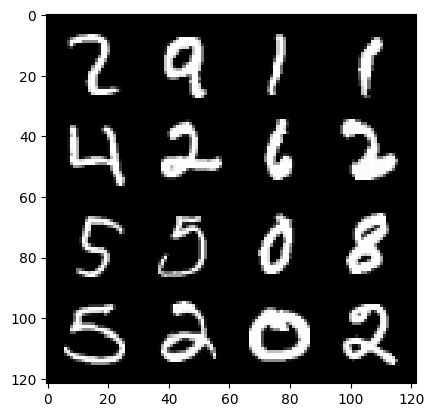

  0%|          | 0/469 [00:00<?, ?it/s]

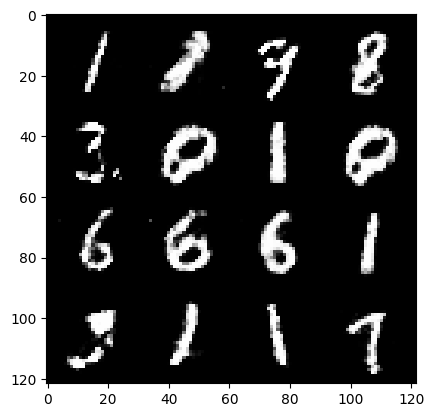

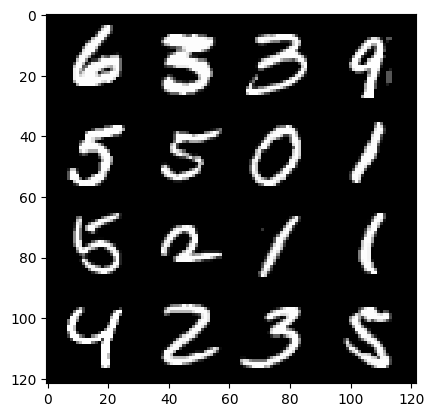

  0%|          | 0/469 [00:00<?, ?it/s]

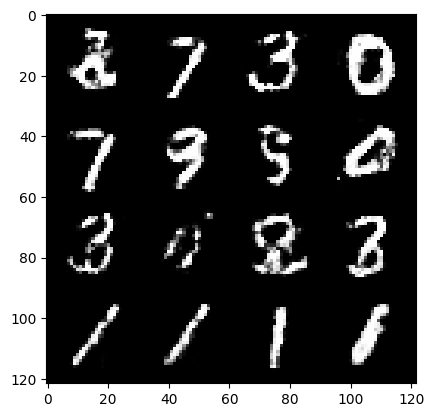

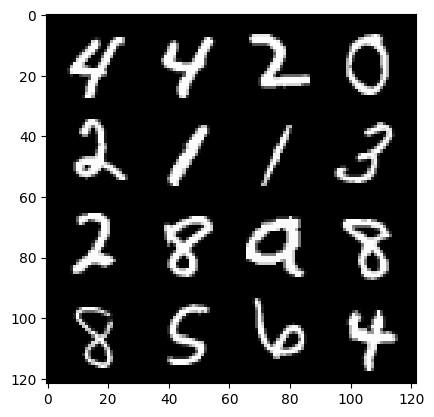

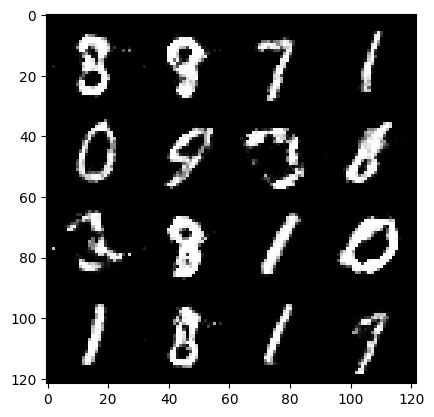

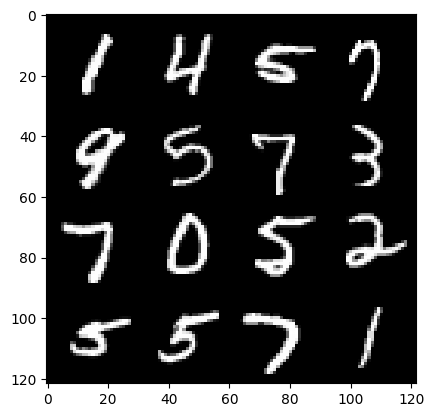

  0%|          | 0/469 [00:00<?, ?it/s]

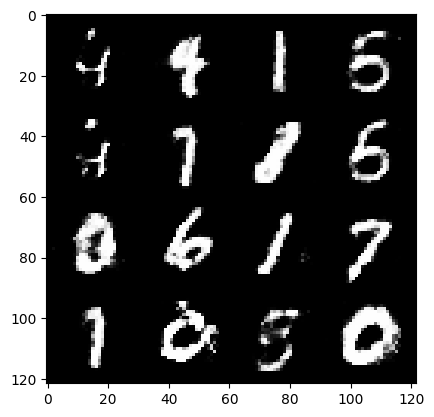

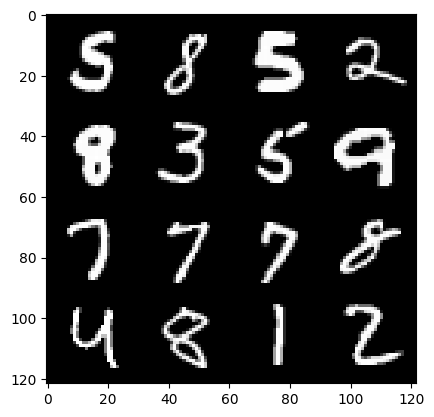

  0%|          | 0/469 [00:00<?, ?it/s]

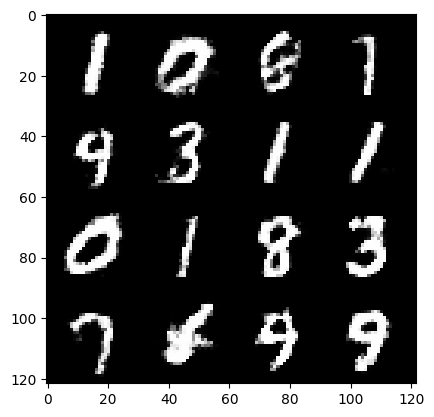

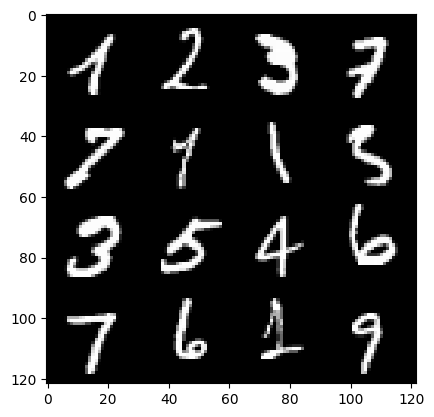

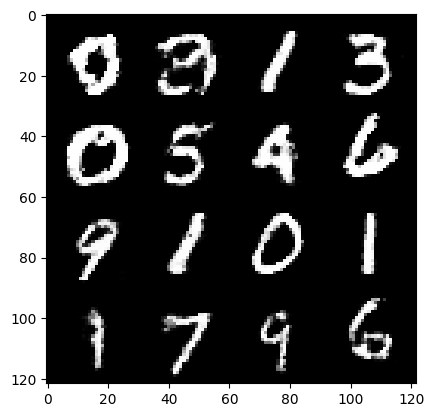

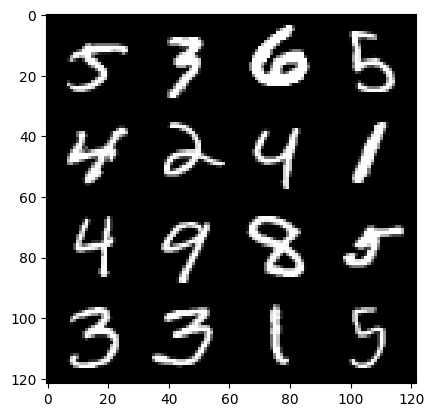

  0%|          | 0/469 [00:00<?, ?it/s]

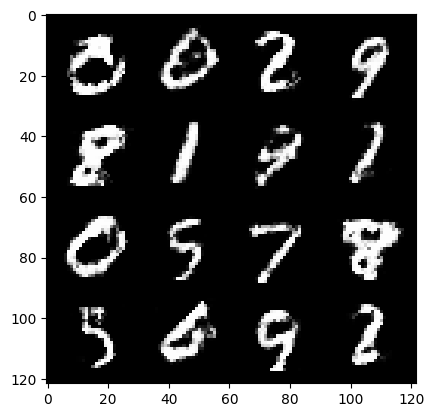

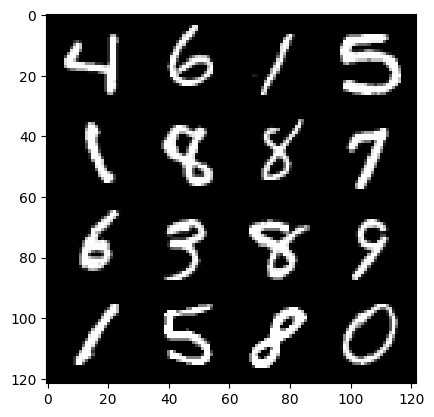

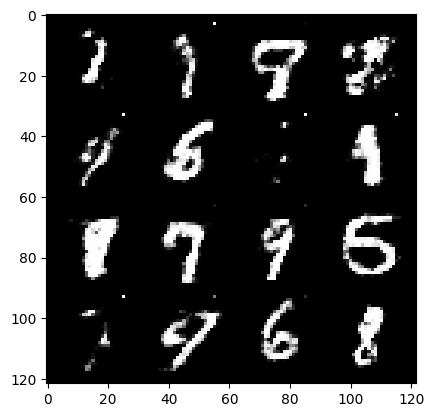

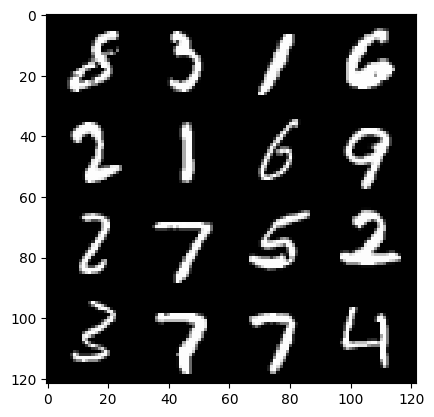

  0%|          | 0/469 [00:00<?, ?it/s]

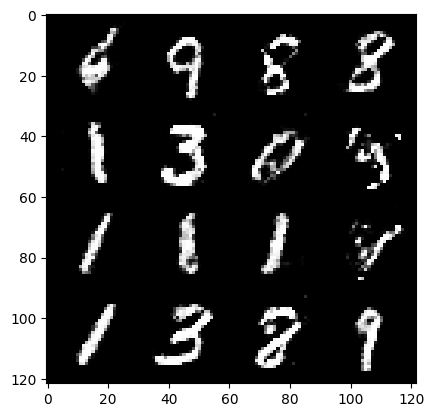

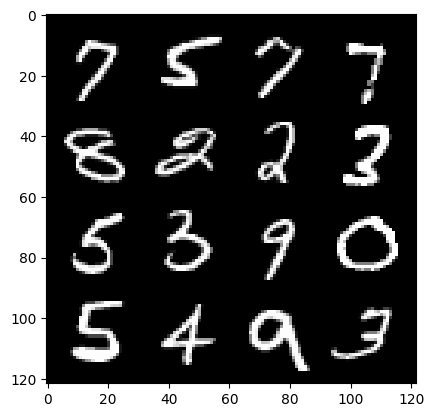

  0%|          | 0/469 [00:00<?, ?it/s]

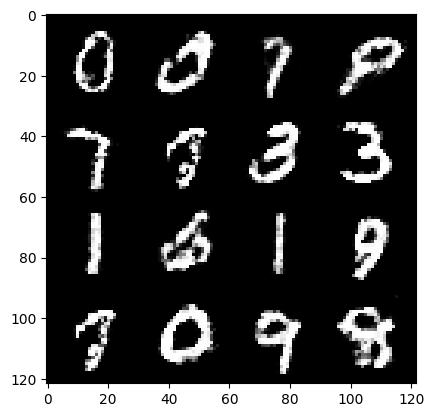

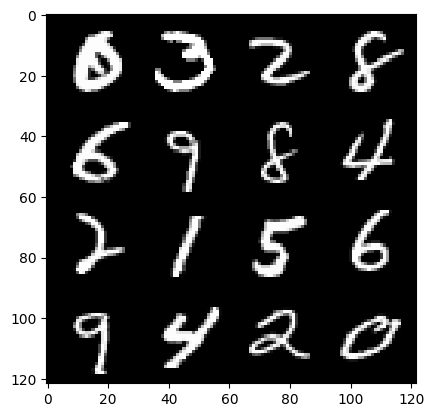

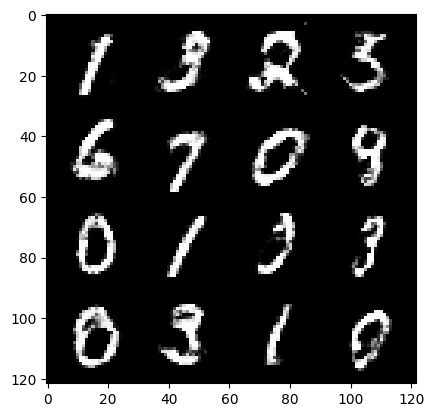

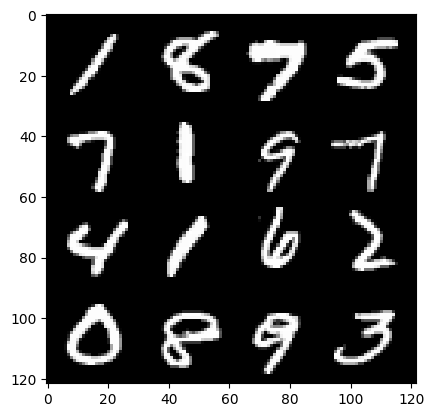

  0%|          | 0/469 [00:00<?, ?it/s]

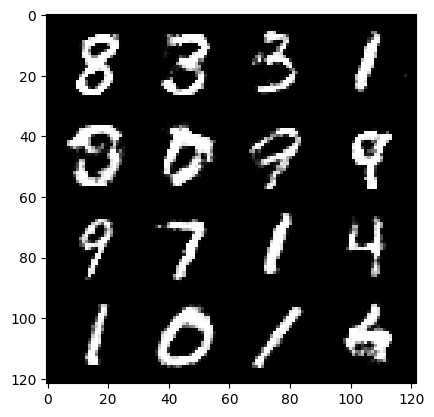

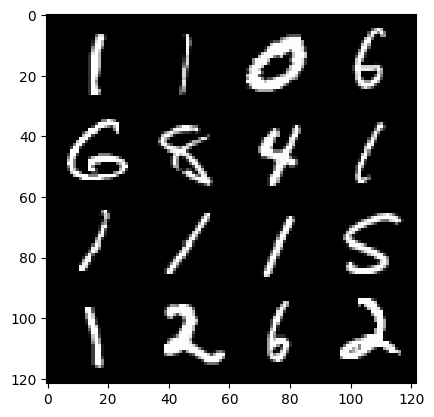

  0%|          | 0/469 [00:00<?, ?it/s]

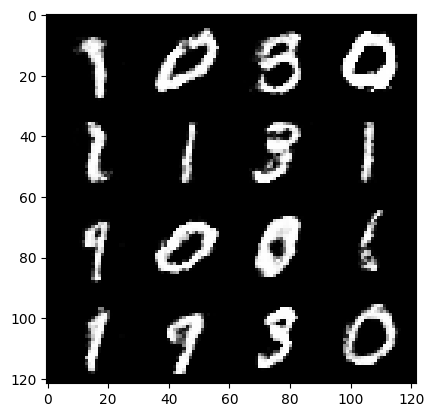

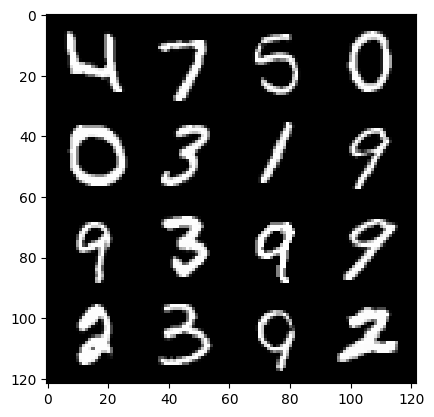

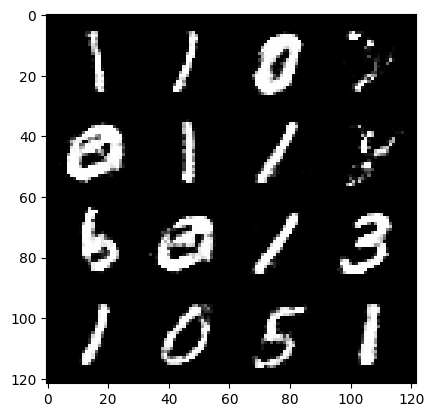

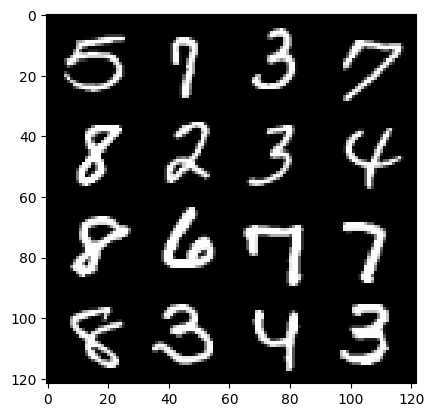

  0%|          | 0/469 [00:00<?, ?it/s]

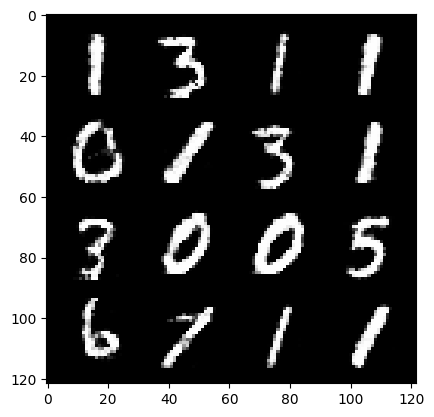

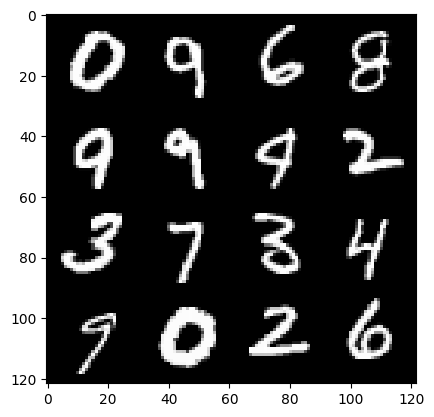

  0%|          | 0/469 [00:00<?, ?it/s]

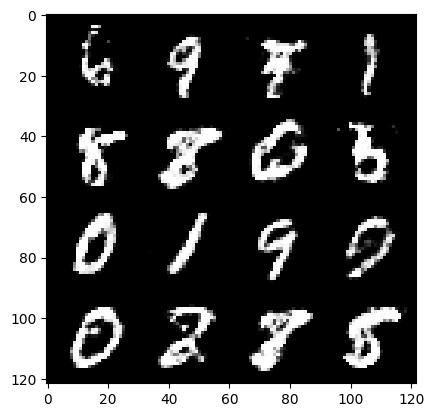

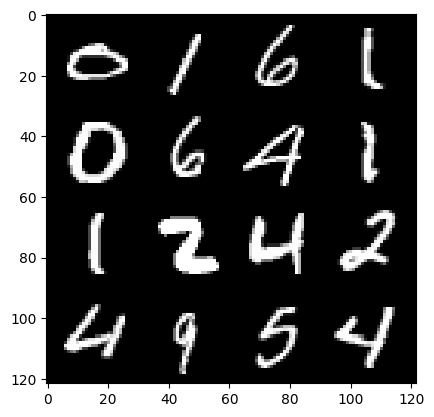

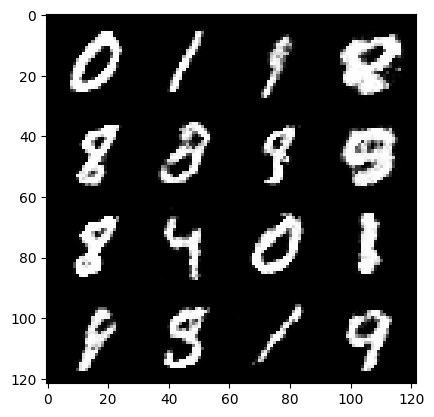

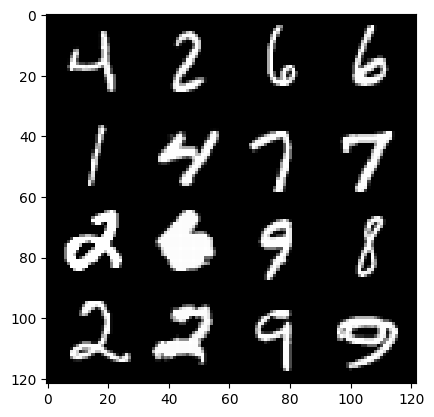

  0%|          | 0/469 [00:00<?, ?it/s]

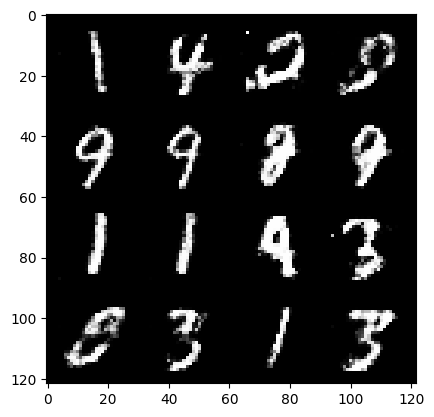

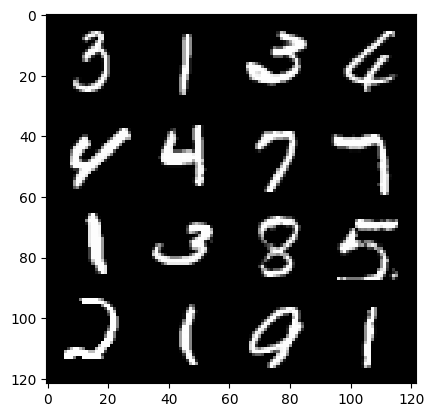

  0%|          | 0/469 [00:00<?, ?it/s]

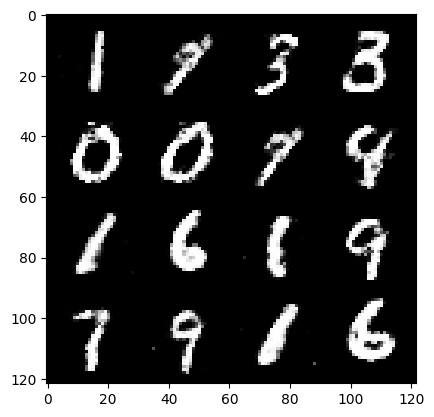

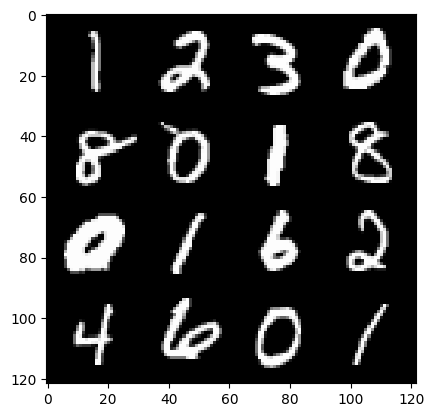

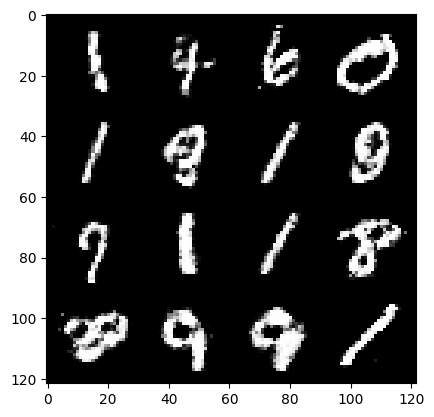

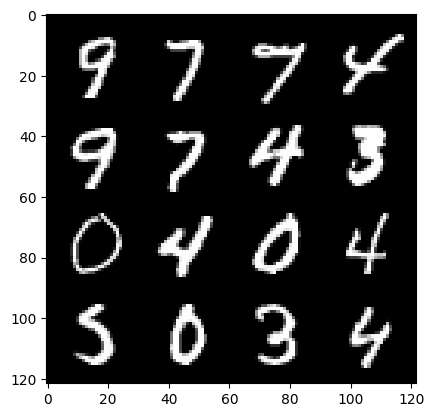

  0%|          | 0/469 [00:00<?, ?it/s]

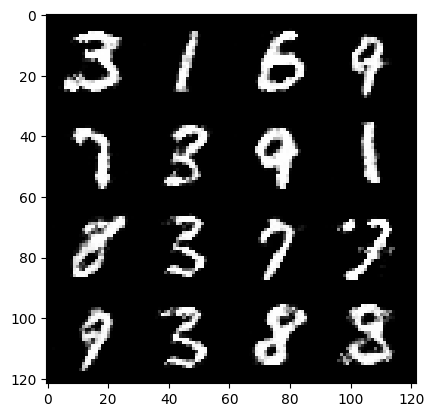

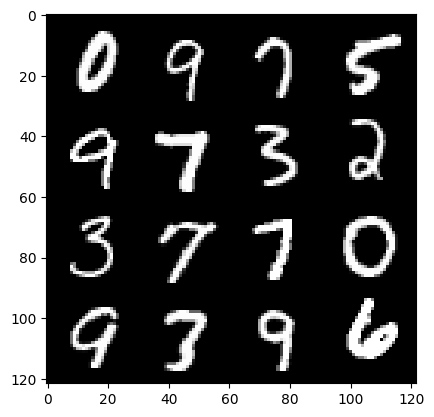

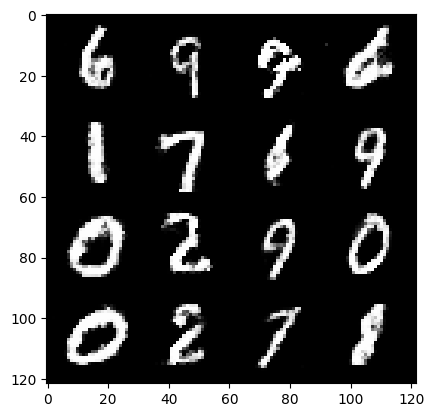

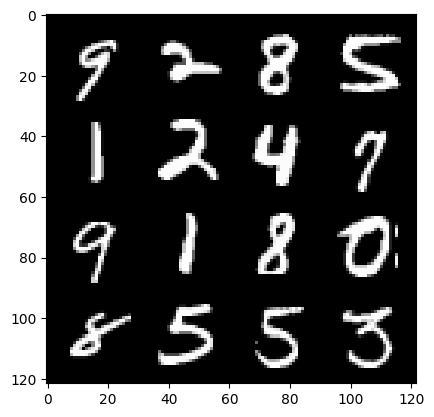

  0%|          | 0/469 [00:00<?, ?it/s]

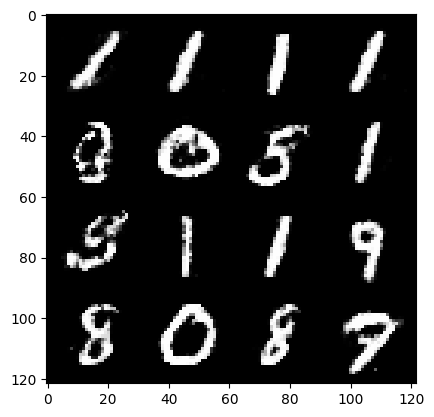

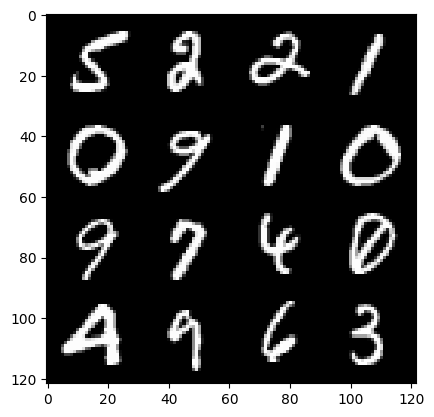

KeyboardInterrupt: 

In [10]:
for epoch in range(cycles):
  for real, _ in tqdm(dataloader):

    disc_opt.zero_grad()
    current_bs = len(real)
    real = real.view(current_bs, -1).to(device)
    d_loss = disc_loss(z_dim, gen, disc, bs, loss_func, real).backward(retain_graph = True)
    disc_opt.step()

    gen_opt.zero_grad()
    g_loss = gen_loss(z_dim, gen, disc, bs, loss_func).backward(retain_graph=True)
    gen_opt.step()



    if(cur_step%info_step==0 and cur_step > 0):
      noise = gen_noise(current_bs, z_dim)
      fake = gen(noise)
      show(fake)
      show(real)

    cur_step += 1


